In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Import the Data into a dataframe
all_data = pd.read_excel('17to22.xlsx')

### Complete Dataset Analysis
#### All Employees hired between September 1, 2017 to September 1, 2022.

In [2]:
list(all_data.columns)

['Last Hire Date',
 'Termination Date',
 'Last Hire Years',
 'City',
 'State',
 'Country',
 'Employment Status',
 'Employment Type',
 'Job Code',
 'Job Family Code',
 'Termination Type Code',
 'Termination Reason',
 'Termination Reason Code',
 'Org Level 1',
 'Org Level 2',
 'Org Level 3',
 'Annual',
 'Org Level 4',
 'Hourly']

In [3]:
# creating binary number value column for Employment Status
all_data['Bin_Status'] = np.where(all_data['Employment Status'] == 'Terminated', 1, 0)


all_data.tail()

,Last Hire Date,Termination Date,Last Hire Years,City,State,Country,Employment Status,Employment Type,Job Code,Job Family Code,Termination Type Code,Termination Reason,Termination Reason Code,Org Level 1,Org Level 2,Org Level 3,Annual,Org Level 4,Hourly,Bin_Status
1773,2020-12-14,2021-05-13,0.4,Yorktown,VA,United States,Terminated,Regular,CESFNF14,WKLFED,V,Personal/family,101,Full Time,CNIC,South East,50691.5496,CNIC - East SR,24.370000,1
1774,2020-02-10,2020-07-21,0.4,Yorktown,VA,United States,Terminated,Regular,CESFYT02,WKLFED,V,Took GS Position Offsite,221,Full Time,CNIC,North East,50700.0000,CNIC - East SR,24.374063,1
1775,2019-03-04,2019-11-08,0.6,Ypsilanti,MI,United States,Terminated,Regular,SECOEC25,VOCCNS,V,Other job,100,Part Time or Temporary,Federal,North East,19758.4800,SECO CS (Counseling),19.000000,1
1776,2022-09-06,2022-09-08,0.0,Yulee,FL,United States,Terminated,Initial,CWFLKB03,WKLFED,V,Personal/family,101,Full Time,CNIC,South East,45907.3656,CNIC - South East SR,22.070000,1
1777,2021-08-16,2021-11-29,0.2,Zionsville,IN,United States,Terminated,Flexible,ODIN01,NaN,V,Other job,100,Flexible,Federal,North East,0.0000,PFC On-Demand,45.000000,1


In [4]:
# For all non-terminated employees, adding 9/1/2022 as termination date to calculate length of employment
import datetime

d = datetime.date(2022, 9, 1)
all_data['Termination Date'] = all_data['Termination Date'].fillna(value=d)
all_data['Termination Date'] = pd.to_datetime(all_data['Termination Date'])

In [5]:
# Adding column to show length of employment in days
from datetime import timedelta

def length(hire_date, term_date):
    return (hire_date-term_date).days

hire_date = all_data['Last Hire Date']
term_date = all_data['Termination Date']
length = term_date - hire_date
d = timedelta(days=1)
length = length/d

all_data['Length of Employment'] = length

In [6]:
# Deleting columns that are not applicable to all employees
data = all_data.drop(['Last Hire Years', 'Termination Type Code', 'Termination Reason',
                  'Termination Reason Code',], axis=1)

In [7]:
print("The dimension of the complete table is: ", all_data.shape)

The dimension of the complete table is:  (1778, 21)


In [8]:
print(data.head(3))

  Last Hire Date Termination Date      City State        Country  \
0     2020-06-16       2022-09-01  Accokeek    MD  United States   
1     2019-11-18       2022-09-01      Agat    GU  United States   
2     2020-03-05       2022-09-01   Ahoskie    NC  United States   

  Employment Status Employment Type  Job Code Job Family Code  \
0            Active         Regular  CEFMBT01          WKLFED   
1            Active         Regular  CWPSGU01          WKLFED   
2            Active         Regular   HRTEMP2              HR   

              Org Level 1 Org Level 2 Org Level 3      Annual  \
0               Full Time        CNIC  North East  55934.3184   
1               Full Time        CNIC      OCONUS  75798.7132   
2  Part Time or Temporary   Corporate  South East      0.0000   

                 Org Level 4     Hourly  Bin_Status  Length of Employment  
0             CNIC - East SR  26.890465           0                 807.0  
1           CNIC - OCONUS SR  36.440288           0  

In [9]:
print("Describe Data")
print(data.describe())

Describe Data
              Annual       Hourly   Bin_Status  Length of Employment
count    1778.000000  1778.000000  1778.000000           1778.000000
mean    45480.031291    28.445956     0.518560            521.749719
std     24102.196995     9.370918     0.499796            435.648380
min         0.000000     0.000000     0.000000            -18.000000
25%     36541.805400    22.066459     0.000000            149.250000
50%     50712.350400    26.890465     1.000000            395.000000
75%     59718.764000    32.457669     1.000000            835.750000
max    178500.043400    85.814028     1.000000           1822.000000


In [10]:
print("Summarized Data")
print(data.describe(include=['O']))

Summarized Data
                  City State        Country Employment Status Employment Type  \
count             1778  1778           1778              1778            1778   
unique             761    54              8                 3               8   
top     Virginia Beach    VA  United States        Terminated         Regular   
freq                89   403           1752               922            1197   

       Job Code Job Family Code Org Level 1 Org Level 2 Org Level 3  \
count      1778            1522        1764        1765        1764   
unique     1195              13           4           4           6   
top      HRTEMP          WKLFED   Full Time        CNIC  South East   
freq         13             557        1261        1007         644   

           Org Level 4  
count             1766  
unique              19  
top     CNIC - East SR  
freq               341  


In [11]:
data.dtypes

Last Hire Date          datetime64[ns]
Termination Date        datetime64[ns]
City                            object
State                           object
Country                         object
Employment Status               object
Employment Type                 object
Job Code                        object
Job Family Code                 object
Org Level 1                     object
Org Level 2                     object
Org Level 3                     object
Annual                         float64
Org Level 4                     object
Hourly                         float64
Bin_Status                       int32
Length of Employment           float64
dtype: object

### Terminated Employee Dataset Analysis
#### Subset of only employees that have been terminated.  This includes voluntary and involuntary termination.

In [12]:
# Creating subset dataframe and deleting columns not applicable to terminated employees
term_data = all_data.loc[data['Employment Status'] == 'Terminated'] 
term_data = term_data.drop(['Employment Status', 'Last Hire Years'], axis=1)

In [13]:
print("The dimension of the Terminated Employee table is: ", term_data.shape)

The dimension of the Terminated Employee table is:  (922, 19)


In [14]:
print(term_data.head(3))

    Last Hire Date Termination Date     City State        Country  \
856     2019-04-16       2021-07-27  Abilene    TX  United States   
857     2020-01-16       2021-12-30  Abilene    TX  United States   
858     2019-11-18       2020-08-31     Agat    GU  United States   

    Employment Type  Job Code Job Family Code Termination Type Code  \
856        Flexible    ODTX19             NaN                V        
857         Regular  RFADYTXB          PFMCNS                V        
858         Regular  CCSAGU03          CSADMN                V        

          Termination Reason Termination Reason Code Org Level 1 Org Level 2  \
856            Abandoned Job                  104       Flexible     Federal   
857  Retirement/Early Retire                  202      Full Time     Federal   
858                   Moving                  102            SCA        CNIC   

    Org Level 3      Annual       Org Level 4    Hourly  Bin_Status  \
856  South West      0.0000     PFC On-Demand 

In [15]:
list(term_data.columns)

['Last Hire Date',
 'Termination Date',
 'City',
 'State',
 'Country',
 'Employment Type',
 'Job Code',
 'Job Family Code',
 'Termination Type Code',
 'Termination Reason',
 'Termination Reason Code',
 'Org Level 1',
 'Org Level 2',
 'Org Level 3',
 'Annual',
 'Org Level 4',
 'Hourly',
 'Bin_Status',
 'Length of Employment']

In [16]:
print("Terminated Employee Data")
print(term_data.describe())

Terminated Employee Data
              Annual      Hourly  Bin_Status  Length of Employment
count     922.000000  922.000000       922.0            922.000000
mean    41399.286769   27.093994         1.0            391.945770
std     23481.959014    9.967673         0.0            331.536883
min         0.000000    0.000000         1.0              0.000000
25%     32553.252000   21.200000         1.0            116.750000
50%     45886.564800   25.010000         1.0            310.500000
75%     56146.624925   31.800900         1.0            609.000000
max    178500.043400   85.814028         1.0           1791.000000


In [17]:
print("Summarized Terminated Employee Data")
print(term_data.describe(include=['O']))

Summarized Terminated Employee Data
                  City State        Country Employment Type Job Code  \
count              922   922            922             922      922   
unique             471    50              6               8      671   
top     Virginia Beach    VA  United States         Regular   HRTEMP   
freq                50   237            914             577       12   

       Job Family Code Termination Type Code Termination Reason  \
count              781                   922                922   
unique              12                     2                 32   
top             WKLFED                V         Personal/family   
freq               310                   807                190   

       Termination Reason Code Org Level 1 Org Level 2 Org Level 3  \
count                      922         909         910         909   
unique                      33           4           4           6   
top                     101      Full Time        CNIC  S

In [18]:
term_data.dtypes

Last Hire Date             datetime64[ns]
Termination Date           datetime64[ns]
City                               object
State                              object
Country                            object
Employment Type                    object
Job Code                           object
Job Family Code                    object
Termination Type Code              object
Termination Reason                 object
Termination Reason Code            object
Org Level 1                        object
Org Level 2                        object
Org Level 3                        object
Annual                            float64
Org Level 4                        object
Hourly                            float64
Bin_Status                          int32
Length of Employment              float64
dtype: object

### Active Employee Dataset Analysis
#### Subset of only employees that are still actively employeed by this company.  This may include individuals who have left and returned, as well as those in their new hire/initial period.

In [19]:
all_data['Employment Status'].unique()

array(['Active', 'Leave of absence', 'Terminated'], dtype=object)

In [20]:
# Creating subset dataframe and deleting columns not applicable to active employees
active_data = all_data.loc[data['Employment Status'].isin(['Active','Leave of absence'])]
active_data = active_data.drop(['Employment Status','Termination Date','Termination Type Code',
                                'Termination Reason', 'Termination Reason Code'], axis=1)
print("The dimension of the Active Employee table is: ", active_data.shape)

The dimension of the Active Employee table is:  (856, 16)


In [21]:
print(active_data.head(3))

  Last Hire Date  Last Hire Years      City State        Country  \
0     2020-06-16              2.2  Accokeek    MD  United States   
1     2019-11-18              2.8      Agat    GU  United States   
2     2020-03-05              2.5   Ahoskie    NC  United States   

  Employment Type  Job Code Job Family Code             Org Level 1  \
0         Regular  CEFMBT01          WKLFED               Full Time   
1         Regular  CWPSGU01          WKLFED               Full Time   
2         Regular   HRTEMP2              HR  Part Time or Temporary   

  Org Level 2 Org Level 3      Annual                Org Level 4     Hourly  \
0        CNIC  North East  55934.3184             CNIC - East SR  26.890465   
1        CNIC      OCONUS  75798.7132           CNIC - OCONUS SR  36.440288   
2   Corporate  South East      0.0000  Woodbridge Corporate Offi  32.671875   

   Bin_Status  Length of Employment  
0           0                 807.0  
1           0                1018.0  
2          

In [22]:
list(active_data.columns)

['Last Hire Date',
 'Last Hire Years',
 'City',
 'State',
 'Country',
 'Employment Type',
 'Job Code',
 'Job Family Code',
 'Org Level 1',
 'Org Level 2',
 'Org Level 3',
 'Annual',
 'Org Level 4',
 'Hourly',
 'Bin_Status',
 'Length of Employment']

In [23]:
print("Active Employee Data")
print(active_data.describe())

Active Employee Data
       Last Hire Years         Annual      Hourly  Bin_Status  \
count       856.000000     856.000000  856.000000       856.0   
mean          1.799065   49875.412658   29.902159         0.0   
std           1.336610   24001.826804    8.449350         0.0   
min           0.000000       0.000000    0.000000         0.0   
25%           0.600000   43681.680000   24.520000         0.0   
50%           1.550000   55370.689550   28.197238         0.0   
75%           2.900000   61510.565700   34.097356         0.0   
max           5.000000  145300.000000   69.853083         0.0   

       Length of Employment  
count            856.000000  
mean             661.561916  
std              488.170257  
min              -18.000000  
25%              216.000000  
50%              580.500000  
75%             1051.000000  
max             1822.000000  


In [24]:
print("Summarized Active Employee Data")
print(active_data.describe(include=['O']))

Summarized Active Employee Data
                  City State        Country Employment Type  Job Code  \
count              856   856            856             856       856   
unique             454    52              8               6       845   
top     Virginia Beach    VA  United States         Regular  RAAFRKSB   
freq                39   166            838             620         2   

       Job Family Code Org Level 1 Org Level 2 Org Level 3     Org Level 4  
count              741         855         855         855             855  
unique              12           4           3           6              17  
top             WKLFED   Full Time        CNIC  South East  PFC Rotational  
freq               247         661         469         306             135  


In [25]:
active_data.dtypes

Last Hire Date          datetime64[ns]
Last Hire Years                float64
City                            object
State                           object
Country                         object
Employment Type                 object
Job Code                        object
Job Family Code                 object
Org Level 1                     object
Org Level 2                     object
Org Level 3                     object
Annual                         float64
Org Level 4                     object
Hourly                         float64
Bin_Status                       int32
Length of Employment           float64
dtype: object

### Initial/New Hire Employee Dataset Analysis
#### Subset of only employees in their initial new hire preiod.  This includes employees that are either currently employed in their first 90 days of employment, or who were terminated within their first 90 days of employment.

In [26]:
all_data['Employment Type'].unique()

array(['Regular', 'Initial', 'Flexible', 'Temporary employee', '<None>',
       'Intern', 'Summer help', 'Contractor/consultant'], dtype=object)

In [27]:
new_data = all_data.loc[data['Employment Type'] == 'Initial']
new_data = new_data.drop(['Last Hire Years'], axis=1)

In [28]:
print("The dimension of the Initial/New Hire Employee table is: ", new_data.shape)

The dimension of the Initial/New Hire Employee table is:  (300, 20)


In [29]:
print(new_data.head(3))

   Last Hire Date Termination Date        City State        Country  \
5      2022-04-01       2022-09-01   Alabaster    AL  United States   
12     2022-08-29       2022-09-01       Aledo    TX  United States   
13     2022-05-24       2022-09-01  Alexandria    VA  United States   

   Employment Status Employment Type  Job Code Job Family Code  \
5             Active         Initial  RFASJNCA          PFMCNS   
12            Active         Initial  CCSAFW01          CSADMN   
13            Active         Initial  SECOMP10          PRGMGT   

   Termination Type Code Termination Reason Termination Reason Code  \
5                    NaN                NaN                     NaN   
12                   NaN                NaN                     NaN   
13                   NaN                NaN                     NaN   

               Org Level 1 Org Level 2 Org Level 3      Annual  \
5                Full Time     Federal  South East  62402.4000   
12                     SCA       

In [30]:
list(new_data.columns)

['Last Hire Date',
 'Termination Date',
 'City',
 'State',
 'Country',
 'Employment Status',
 'Employment Type',
 'Job Code',
 'Job Family Code',
 'Termination Type Code',
 'Termination Reason',
 'Termination Reason Code',
 'Org Level 1',
 'Org Level 2',
 'Org Level 3',
 'Annual',
 'Org Level 4',
 'Hourly',
 'Bin_Status',
 'Length of Employment']

In [31]:
print("Initial/New Hire Data")
print(new_data.describe())

Initial/New Hire Data
              Annual      Hourly  Bin_Status  Length of Employment
count     300.000000  300.000000  300.000000            300.000000
mean    52238.222405   26.250525    0.596667            154.076667
std     17640.656127    7.130128    0.491386            317.004517
min         0.000000   14.150000    0.000000            -18.000000
25%     43099.257600   21.201108    0.000000             21.000000
50%     51000.000000   24.865000    1.000000             51.000000
75%     61705.573200   29.665000    1.000000             92.250000
max    145300.000000   69.853083    1.000000           1781.000000


In [32]:
print("Summarized Initial/New Hire Employee Data")
print(new_data.describe(include=['O']))

Summarized Initial/New Hire Employee Data
                  City State        Country Employment Status Employment Type  \
count              300   300            300               300             300   
unique             195    42              2                 3               1   
top     Virginia Beach    VA  United States        Terminated         Initial   
freq                17    63            299               179             300   

        Job Code Job Family Code Termination Type Code Termination Reason  \
count        300             282                   179                179   
unique       252              11                     2                 24   
top     SECOEC18          WKLFED                V         Personal/family   
freq           4              99                   158                 53   

       Termination Reason Code Org Level 1 Org Level 2 Org Level 3  \
count                      179         300         300         300   
unique                    

In [33]:
new_data.dtypes

Last Hire Date             datetime64[ns]
Termination Date           datetime64[ns]
City                               object
State                              object
Country                            object
Employment Status                  object
Employment Type                    object
Job Code                           object
Job Family Code                    object
Termination Type Code              object
Termination Reason                 object
Termination Reason Code            object
Org Level 1                        object
Org Level 2                        object
Org Level 3                        object
Annual                            float64
Org Level 4                        object
Hourly                            float64
Bin_Status                          int32
Length of Employment              float64
dtype: object

### All Employee Data Visualizations

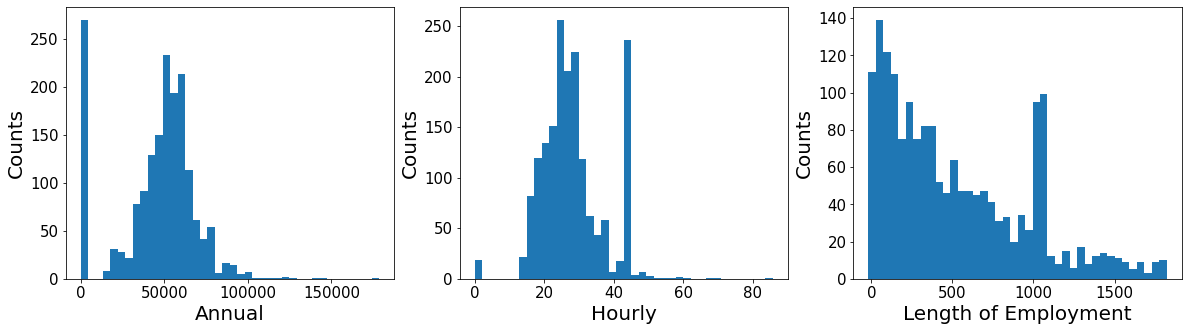

In [34]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 5)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3)

# Specify the features of interest
num_features = ['Annual','Hourly', 'Length of Employment']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
#plt.show()
plt.savefig('data_1')

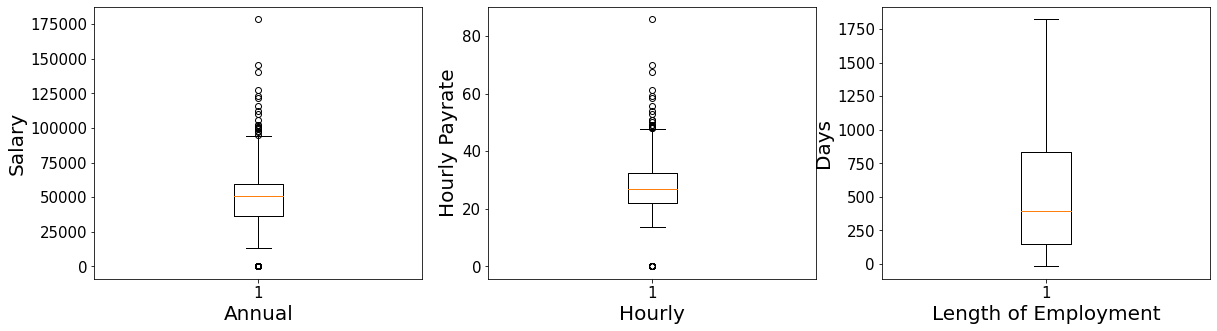

In [35]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 5)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3)

# Specify the features of interest
num_features = ['Annual','Hourly', 'Length of Employment']
xaxes = num_features
yaxes = ['Salary', 'Hourly Payrate', 'Days']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.boxplot(data[num_features[idx]])
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
#plt.show()
plt.savefig('all_box')

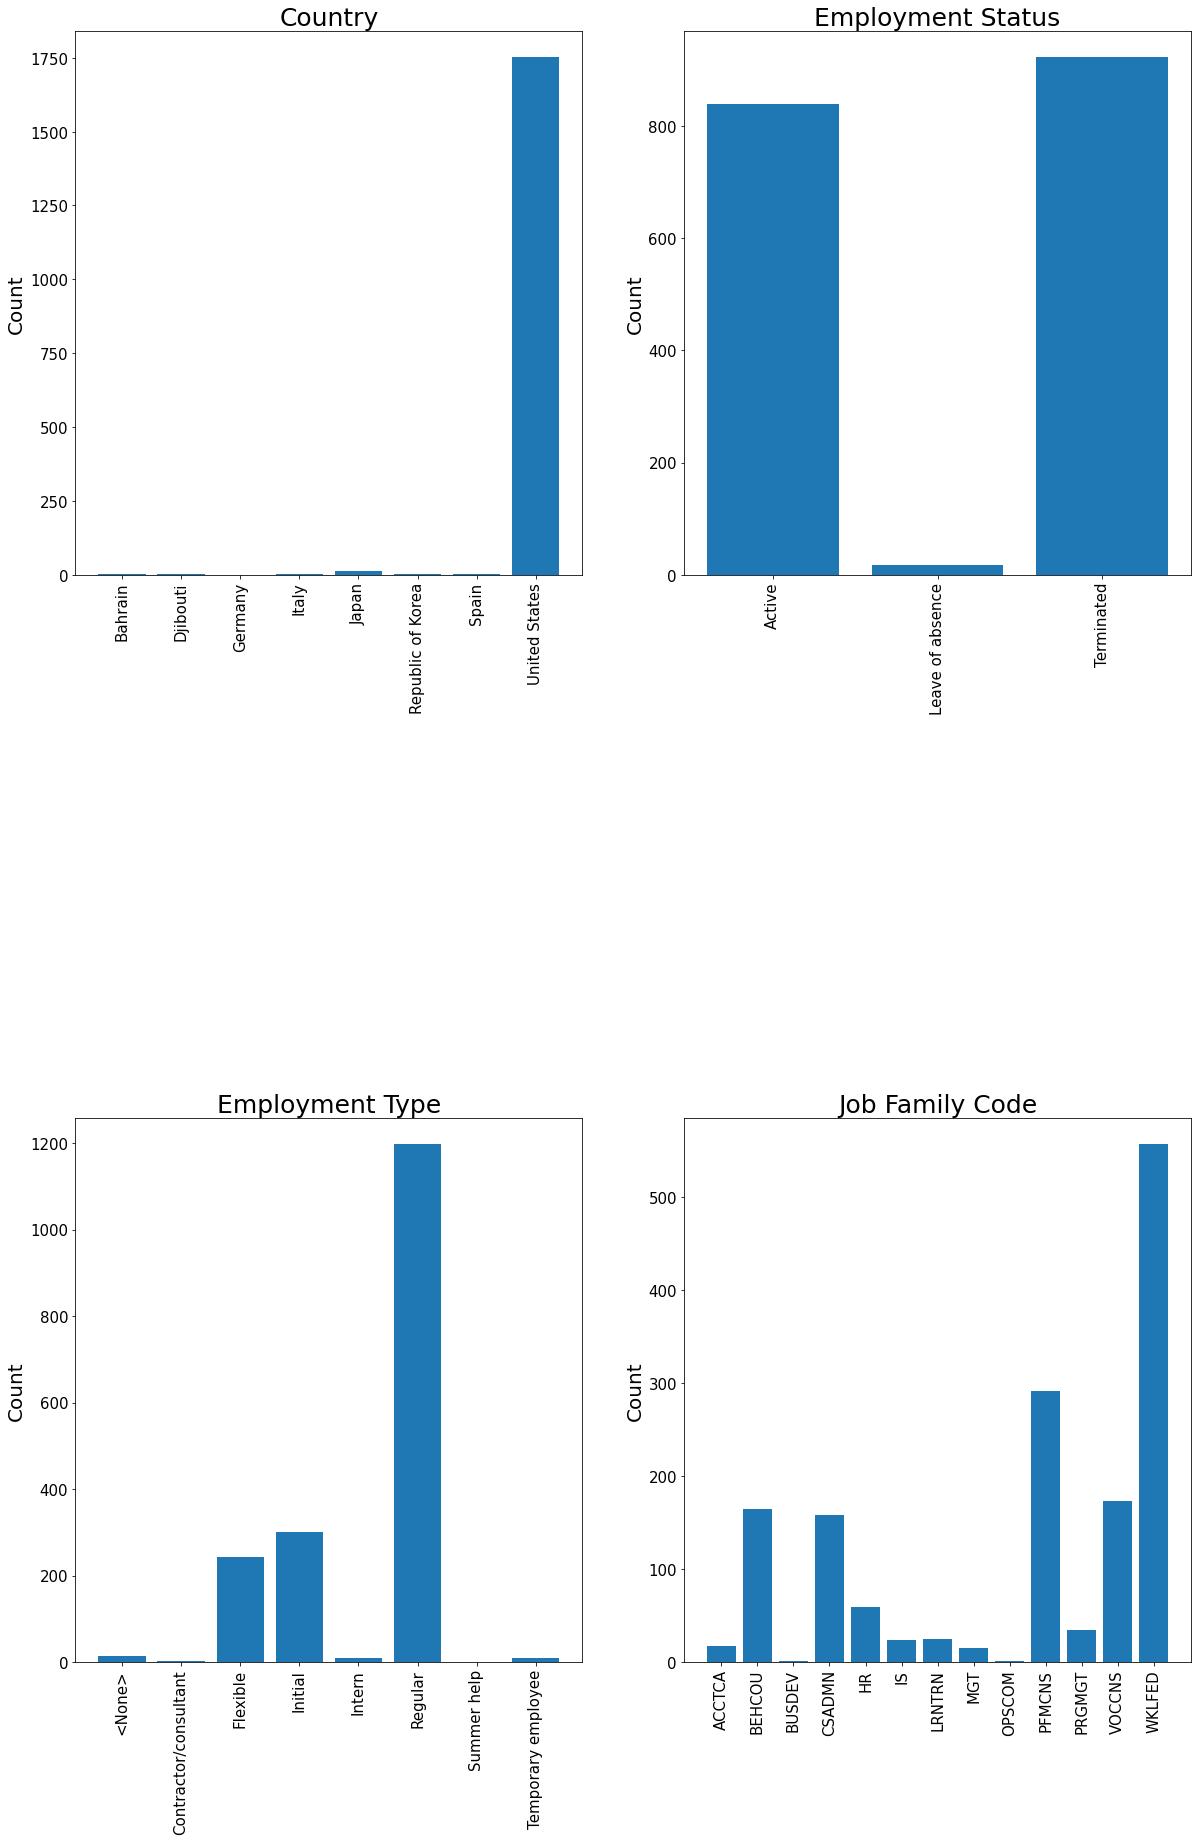

In [36]:
plt.rcParams['figure.figsize'] = (20, 30)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.subplots_adjust(hspace=1)

# make the data read to feed into the visulizer
X_Sex = data.groupby('Country').size().reset_index(name='Counts')['Country']
Y_Sex = data.groupby('Country').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Sex, Y_Sex)
axes[0, 0].set_title('Country', fontsize=25)
axes[0, 0].set_ylabel('Count', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_Married = data.groupby('Employment Status').size().reset_index(name='Counts')['Employment Status']
Y_Married = data.groupby('Employment Status').size().reset_index(name='Counts')['Counts']
axes[0, 1].bar(X_Married, Y_Married)
axes[0, 1].set_title('Employment Status', fontsize=25)
axes[0, 1].set_ylabel('Count', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_Status = data.groupby('Employment Type').size().reset_index(name='Counts')['Employment Type']
Y_Status = data.groupby('Employment Type').size().reset_index(name='Counts')['Counts']
axes[1, 0].bar(X_Status, Y_Status)
axes[1, 0].set_title('Employment Type', fontsize=25)
axes[1, 0].set_ylabel('Count', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_Score = data.groupby('Job Family Code').size().reset_index(name='Counts')['Job Family Code']
Y_Score = data.groupby('Job Family Code').size().reset_index(name='Counts')['Counts']
axes[1, 1].bar(X_Score, Y_Score)
axes[1, 1].set_title('Job Family Code', fontsize=25)
axes[1, 1].set_ylabel('Count', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].tick_params(axis='x', rotation = 90)


plt.savefig('data_2a')

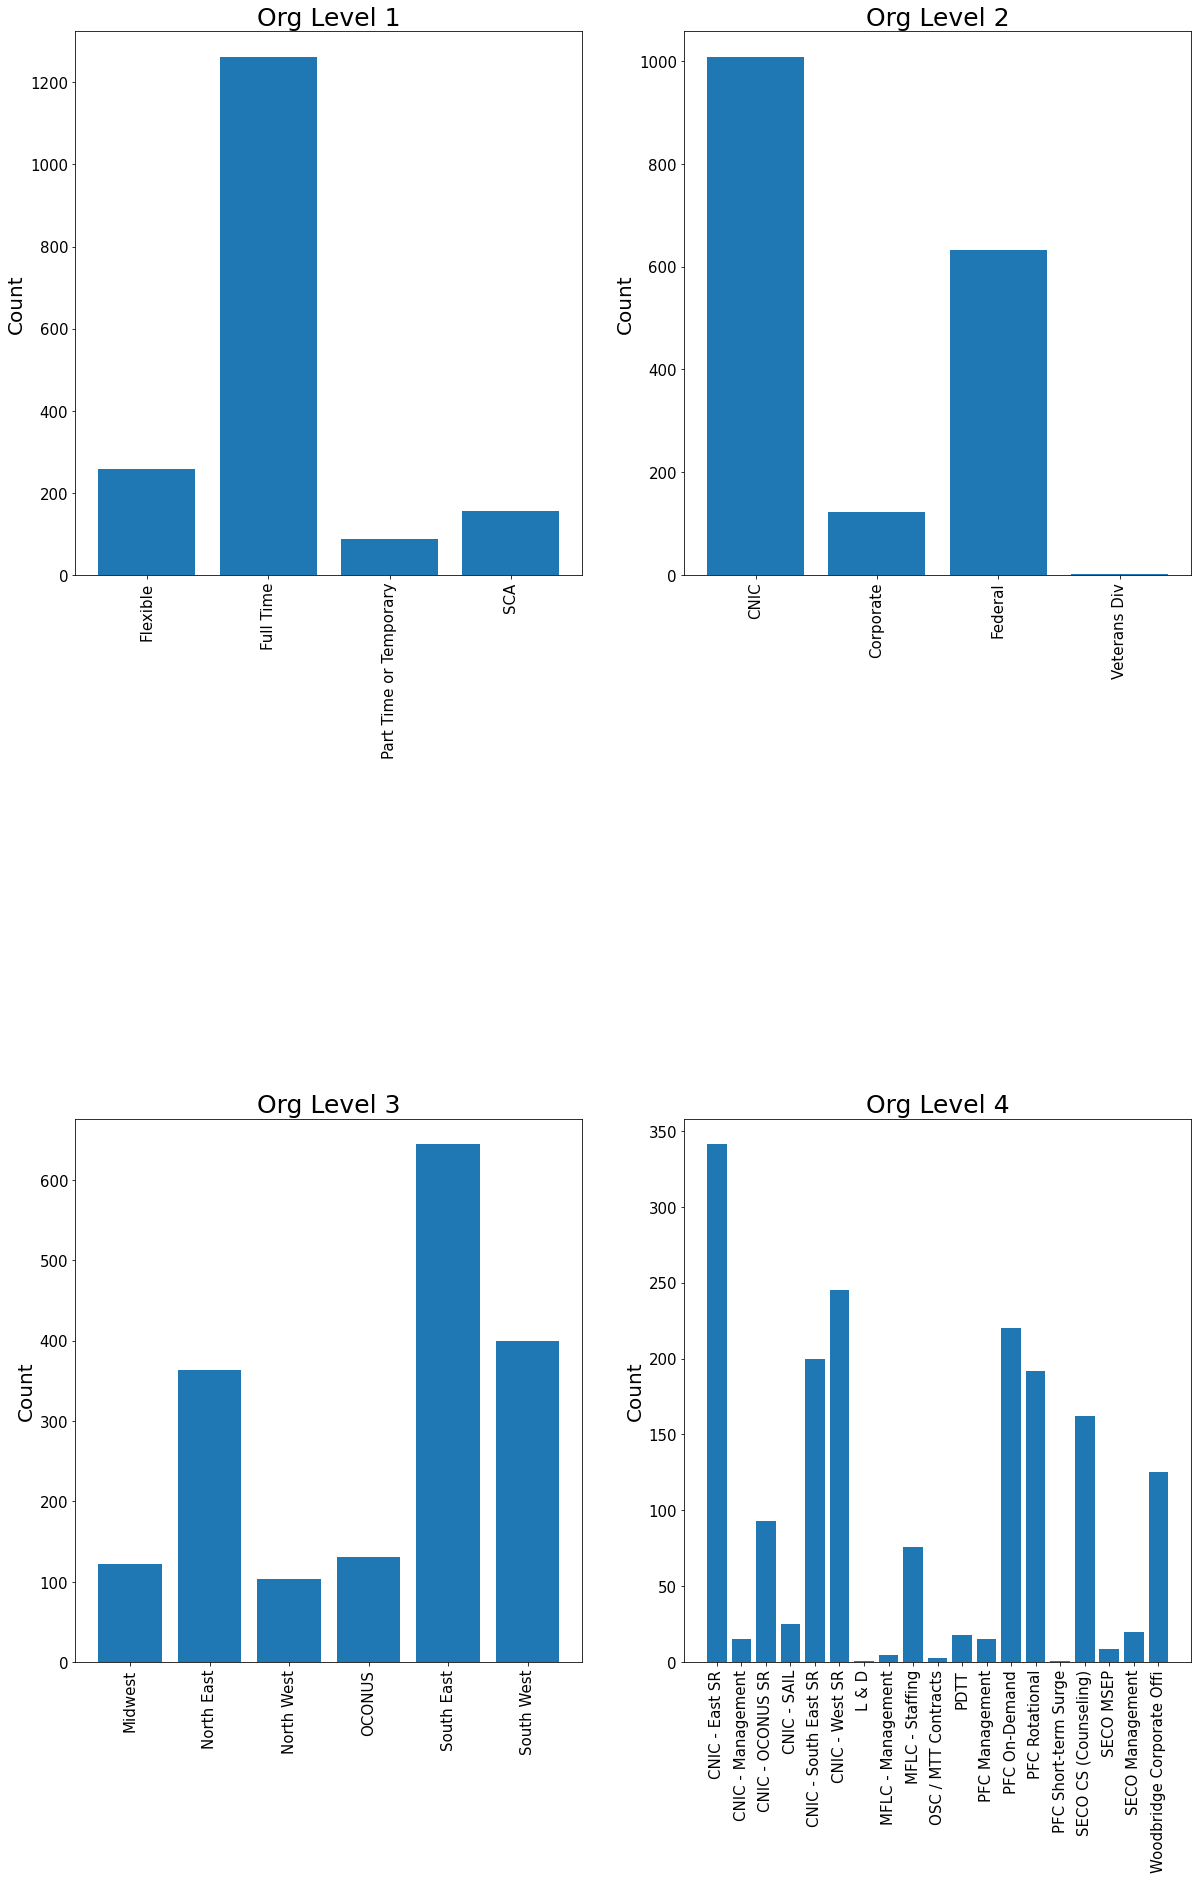

In [38]:
plt.rcParams['figure.figsize'] = (20, 30)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.subplots_adjust(hspace=1)


# make the data read to feed into the visulizer
X_Race = data.groupby('Org Level 1').size().reset_index(name='Counts')['Org Level 1']
Y_Race = data.groupby('Org Level 1').size().reset_index(name='Counts')['Counts']
axes[0, 0].bar(X_Race, Y_Race)
axes[0, 0].set_title('Org Level 1', fontsize=25)
axes[0, 0].set_ylabel('Count', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_Source = data.groupby('Org Level 2').size().reset_index(name='Counts')['Org Level 2']
Y_Source = data.groupby('Org Level 2').size().reset_index(name='Counts')['Counts']
axes[0, 1].bar(X_Source, Y_Source)
axes[0, 1].set_title('Org Level 2', fontsize=25)
axes[0, 1].set_ylabel('Count', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_Source = data.groupby('Org Level 3').size().reset_index(name='Counts')['Org Level 3']
Y_Source = data.groupby('Org Level 3').size().reset_index(name='Counts')['Counts']
axes[1, 0].bar(X_Source, Y_Source)
axes[1, 0].set_title('Org Level 3', fontsize=25)
axes[1, 0].set_ylabel('Count', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_Source = data.groupby('Org Level 4').size().reset_index(name='Counts')['Org Level 4']
Y_Source = data.groupby('Org Level 4').size().reset_index(name='Counts')['Counts']
axes[1, 1].bar(X_Source, Y_Source)
axes[1, 1].set_title('Org Level 4', fontsize=25)
axes[1, 1].set_ylabel('Count', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].tick_params(axis='x', rotation = 90)

plt.savefig('data_2b')

### Terminated Employee Visualizations

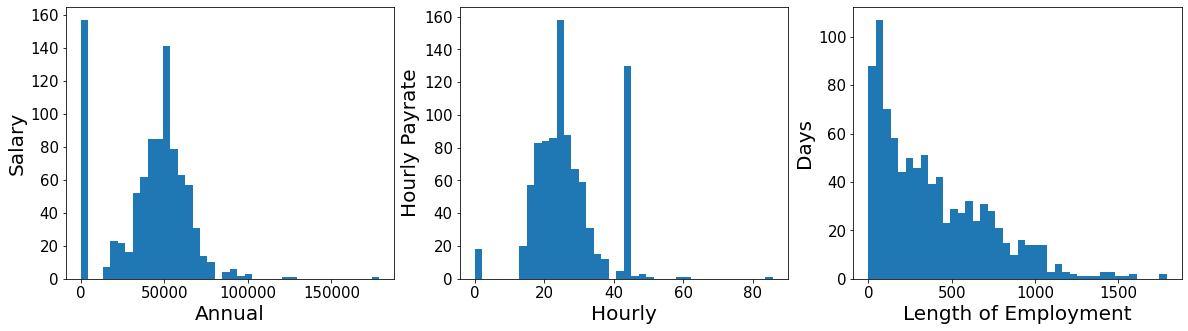

In [39]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 5)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3)

# Specify the features of interest
num_features = ['Annual','Hourly', 'Length of Employment']
xaxes = num_features
yaxes = ['Salary', 'Hourly Payrate', 'Days']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(term_data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
#plt.show()
plt.savefig('term_data_1')

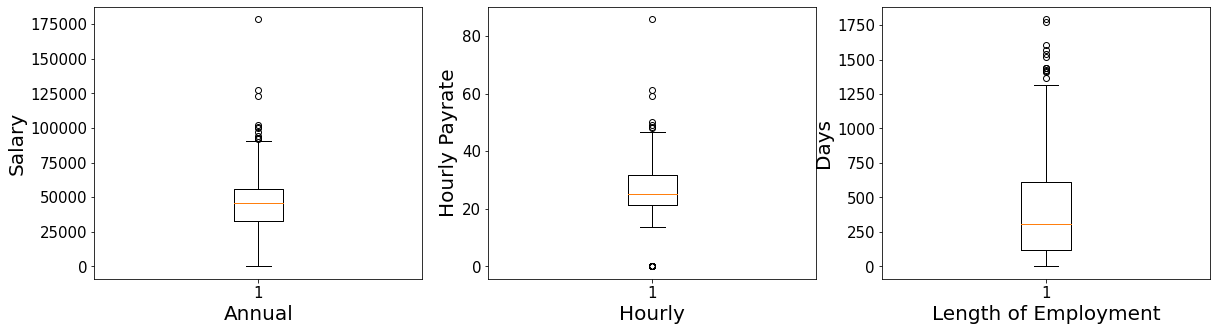

In [40]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 5)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3)

# Specify the features of interest
num_features = ['Annual','Hourly', 'Length of Employment']
xaxes = num_features
yaxes = ['Salary', 'Hourly Payrate', 'Days']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.boxplot(term_data[num_features[idx]])
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
#plt.show()
plt.savefig('term_box')

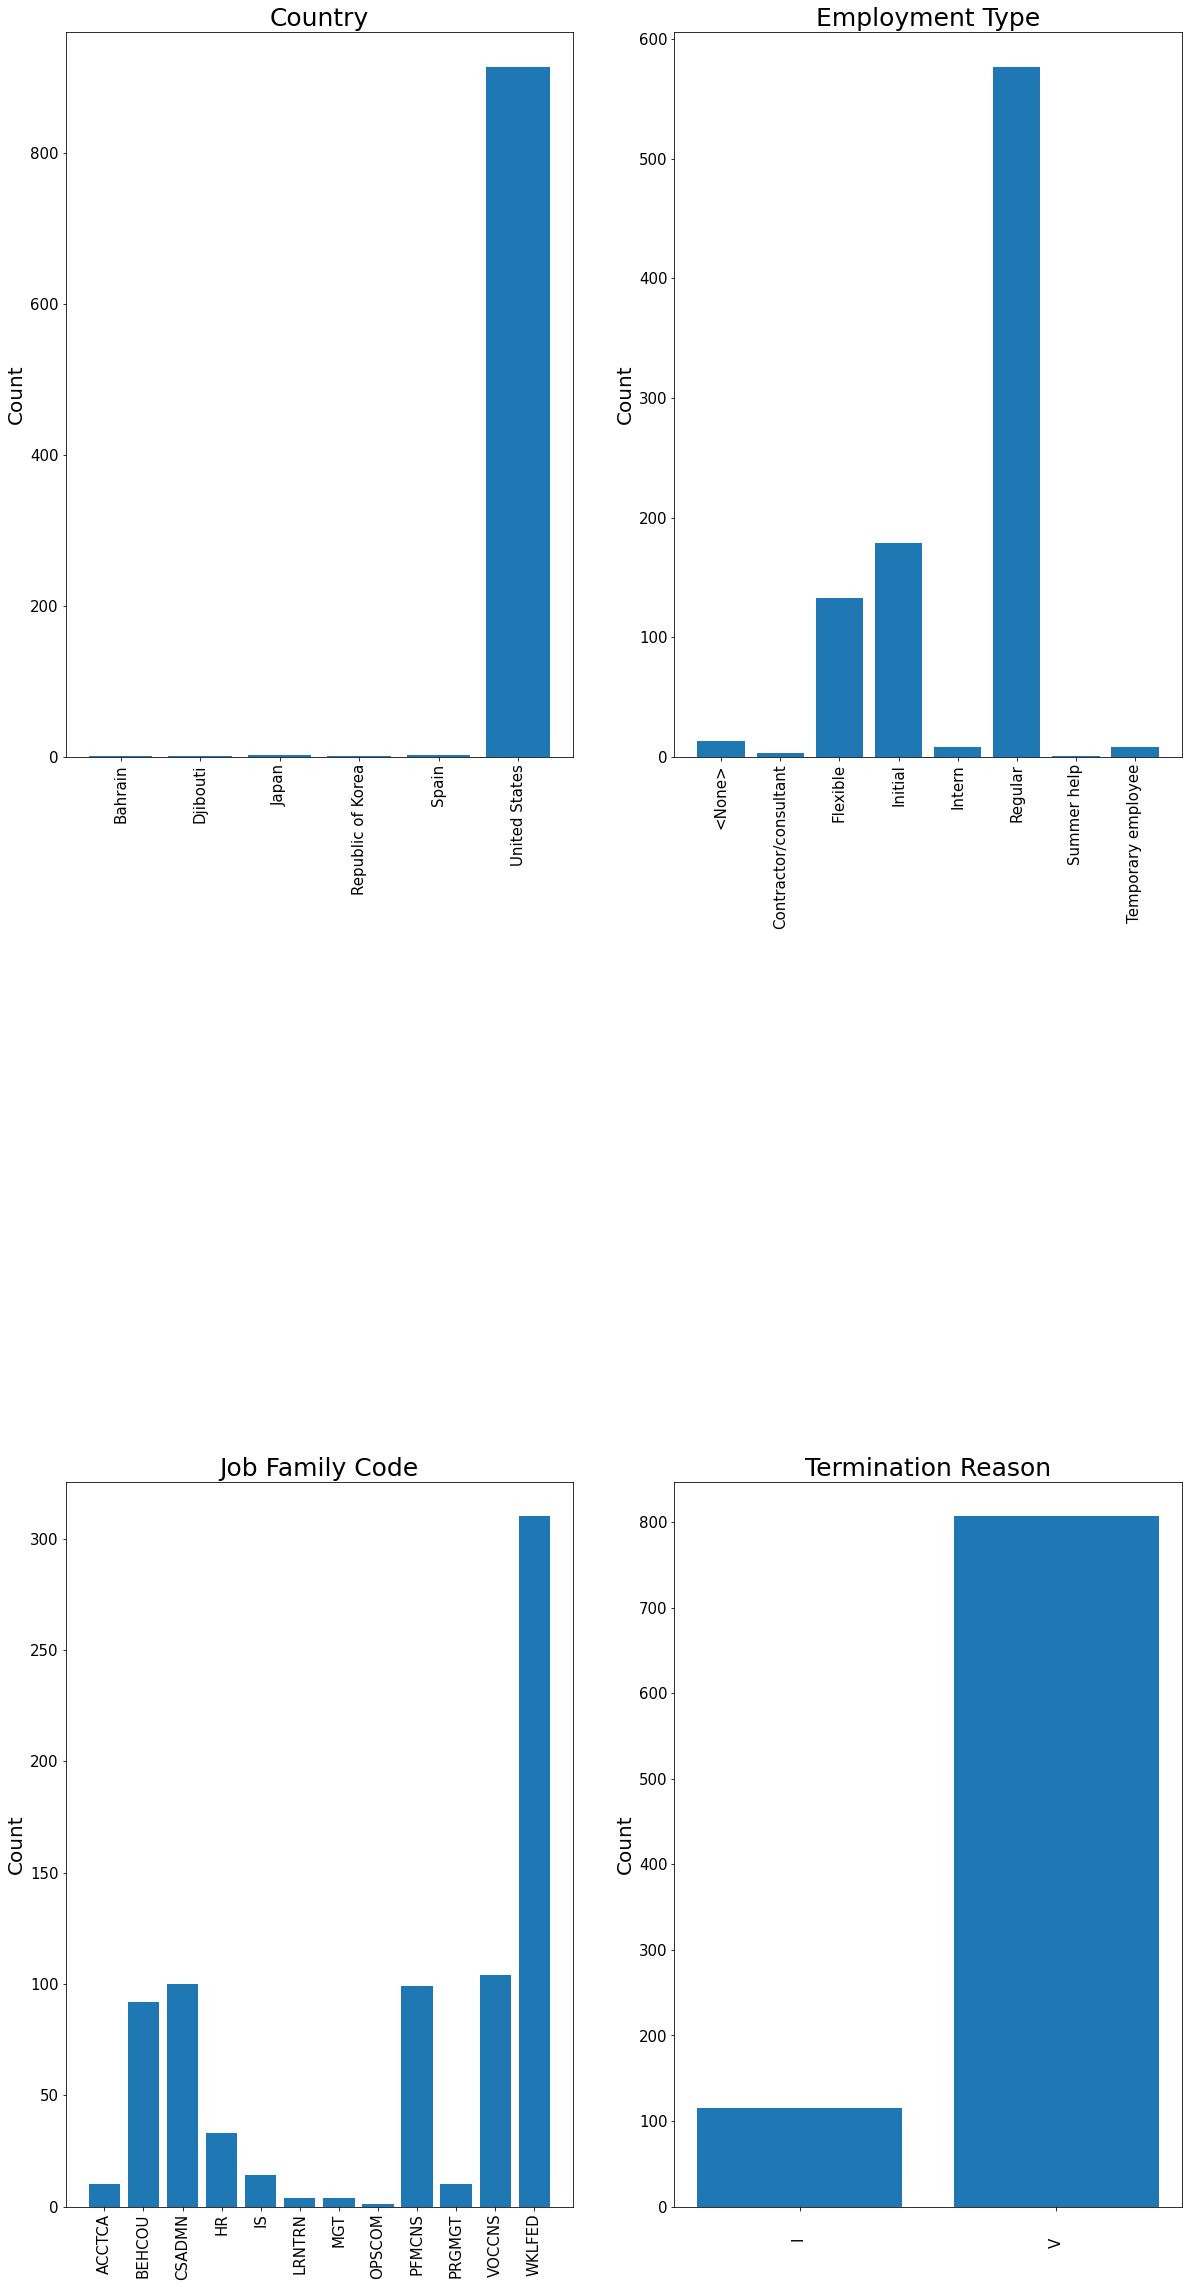

In [41]:
plt.rcParams['figure.figsize'] = (20, 40)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.subplots_adjust(hspace=1)

# make the data read to feed into the visulizer
X_Country = term_data.groupby('Country').size().reset_index(name='Counts')['Country']
Y_Country = term_data.groupby('Country').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Country, Y_Country)
axes[0, 0].set_title('Country', fontsize=25)
axes[0, 0].set_ylabel('Count', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].tick_params(axis='x', rotation = 90)


# make the data read to feed into the visulizer
X_Type = term_data.groupby('Employment Type').size().reset_index(name='Counts')['Employment Type']
Y_Type = term_data.groupby('Employment Type').size().reset_index(name='Counts')['Counts']
axes[0, 1].bar(X_Type, Y_Type)
axes[0, 1].set_title('Employment Type', fontsize=25)
axes[0, 1].set_ylabel('Count', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_Job = term_data.groupby('Job Family Code').size().reset_index(name='Counts')['Job Family Code']
Y_Job = term_data.groupby('Job Family Code').size().reset_index(name='Counts')['Counts']
axes[1, 0].bar(X_Job, Y_Job)
axes[1, 0].set_title('Job Family Code', fontsize=25)
axes[1, 0].set_ylabel('Count', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_TerminationC = term_data.groupby('Termination Type Code').size().reset_index(name='Counts')['Termination Type Code']
Y_TerminationC = term_data.groupby('Termination Type Code').size().reset_index(name='Counts')['Counts']
axes[1, 1].bar(X_TerminationC, Y_TerminationC)
axes[1, 1].set_title('Termination Reason', fontsize=25)
axes[1, 1].set_ylabel('Count', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].tick_params(axis='x', rotation = 90)

plt.savefig('term_data_2a')

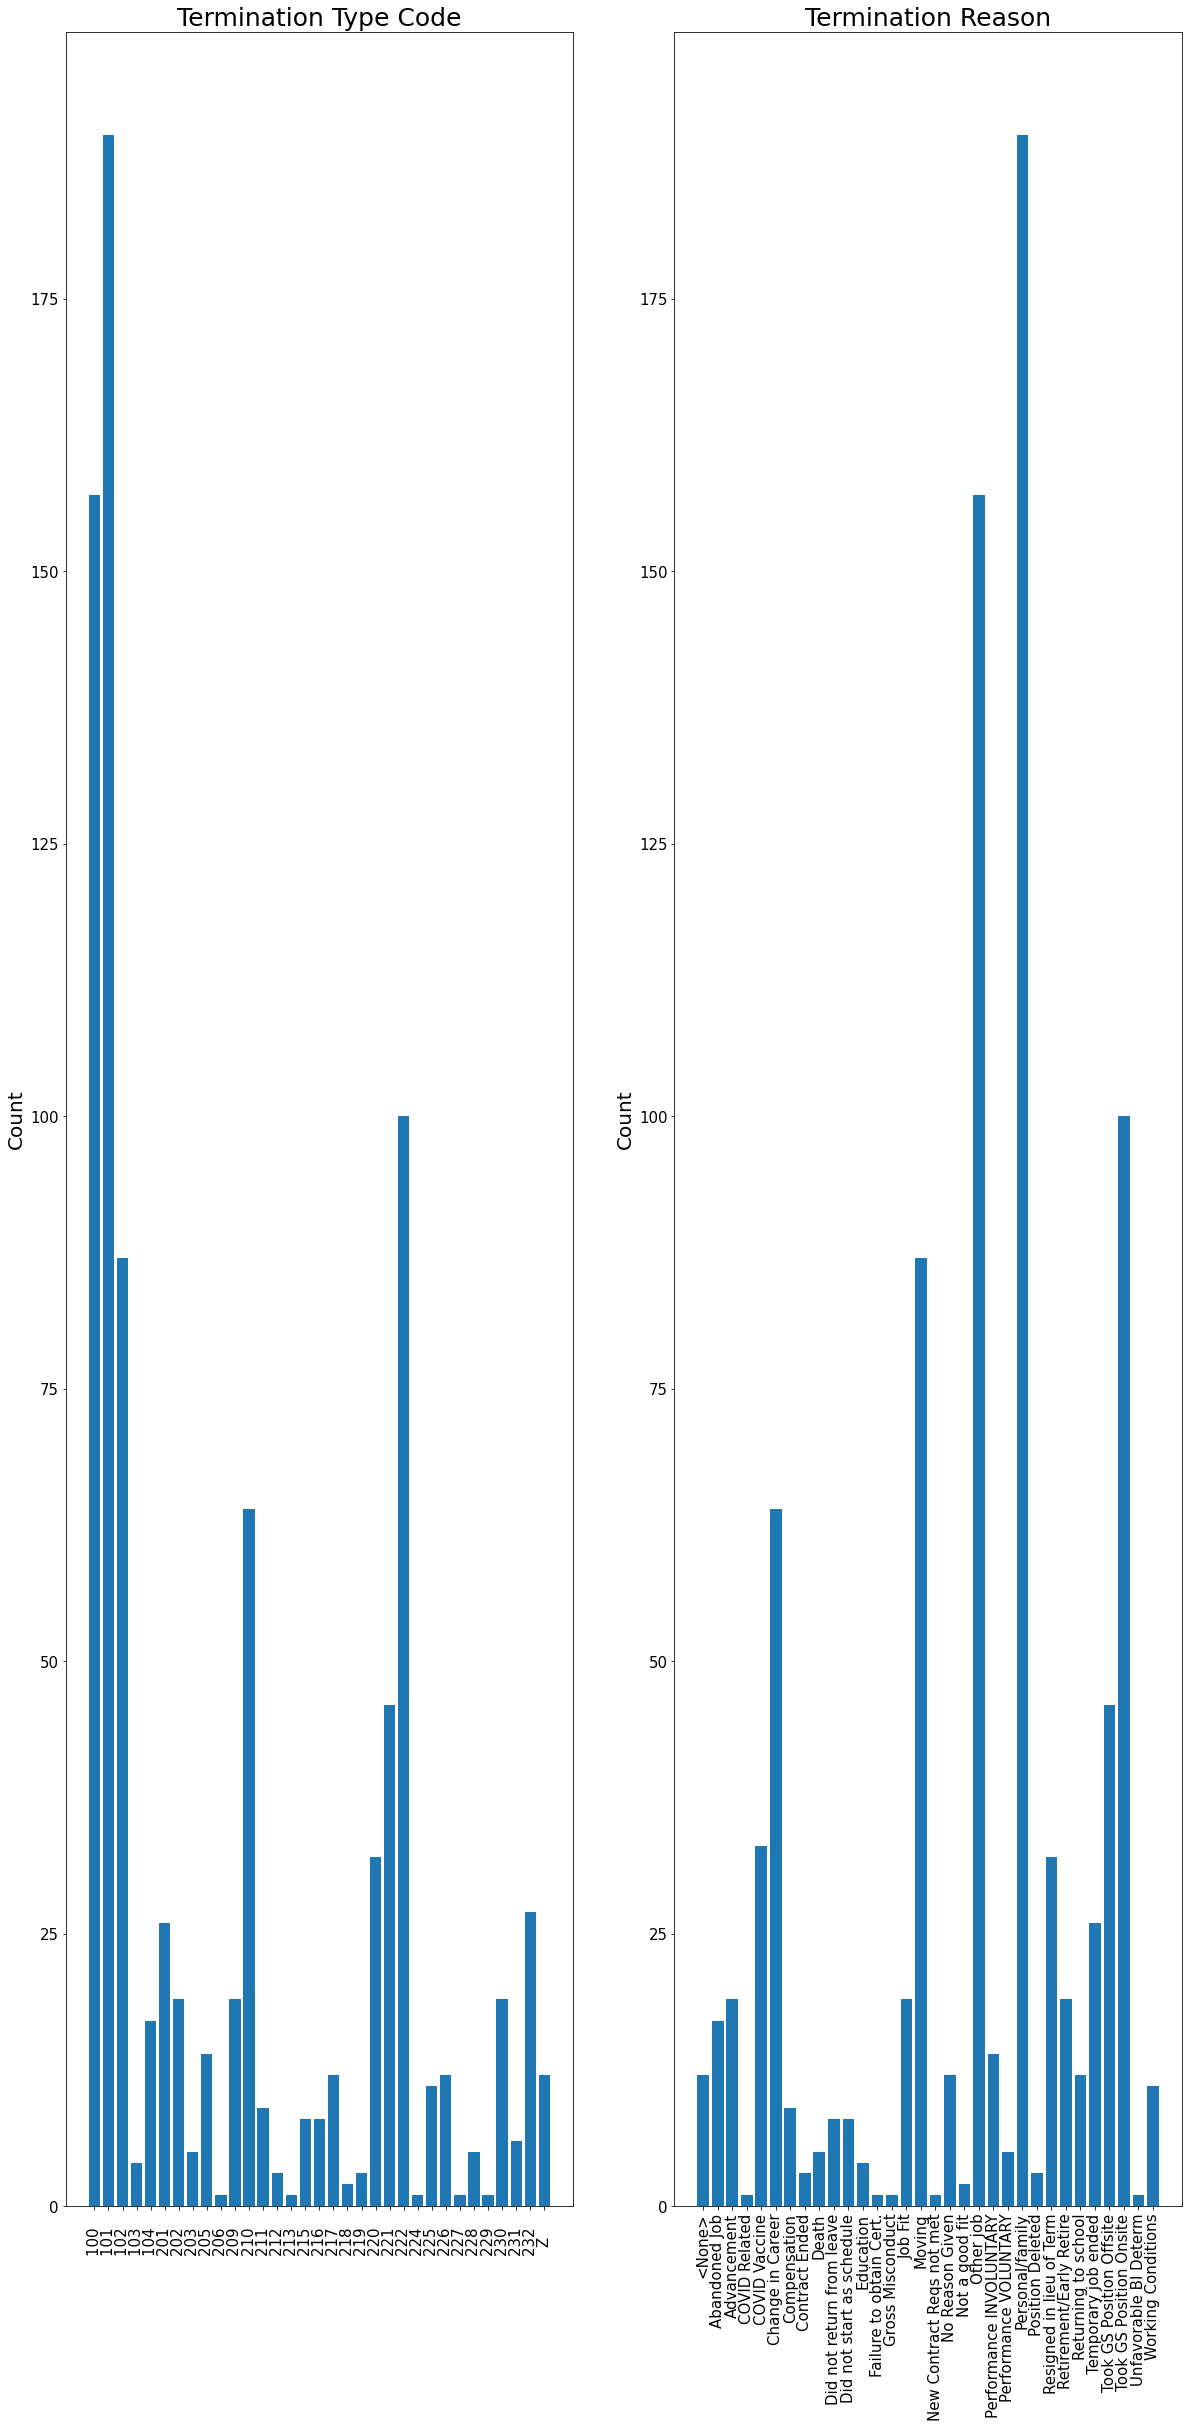

In [46]:
plt.rcParams['figure.figsize'] = (20, 40)

# make subplots
fig, axes = plt.subplots(ncols = 2)
fig.subplots_adjust(hspace=1)

# make the data read to feed into the visulizer
X_TerminationCode = term_data.groupby('Termination Reason Code').size().reset_index(name='Counts')['Termination Reason Code']
Y_TerminationCode = term_data.groupby('Termination Reason Code').size().reset_index(name='Counts')['Counts']
axes[0].bar(X_TerminationCode, Y_TerminationCode)
axes[0].set_title('Termination Type Code', fontsize=25)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_Termination = term_data.groupby('Termination Reason').size().reset_index(name='Counts')['Termination Reason']
Y_Termination = term_data.groupby('Termination Reason').size().reset_index(name='Counts')['Counts']
axes[1].bar(X_Termination, Y_Termination)
axes[1].set_title('Termination Reason', fontsize=25)
axes[1].set_ylabel('Count', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].tick_params(axis='x', rotation = 90)


plt.savefig('term_data_2b')

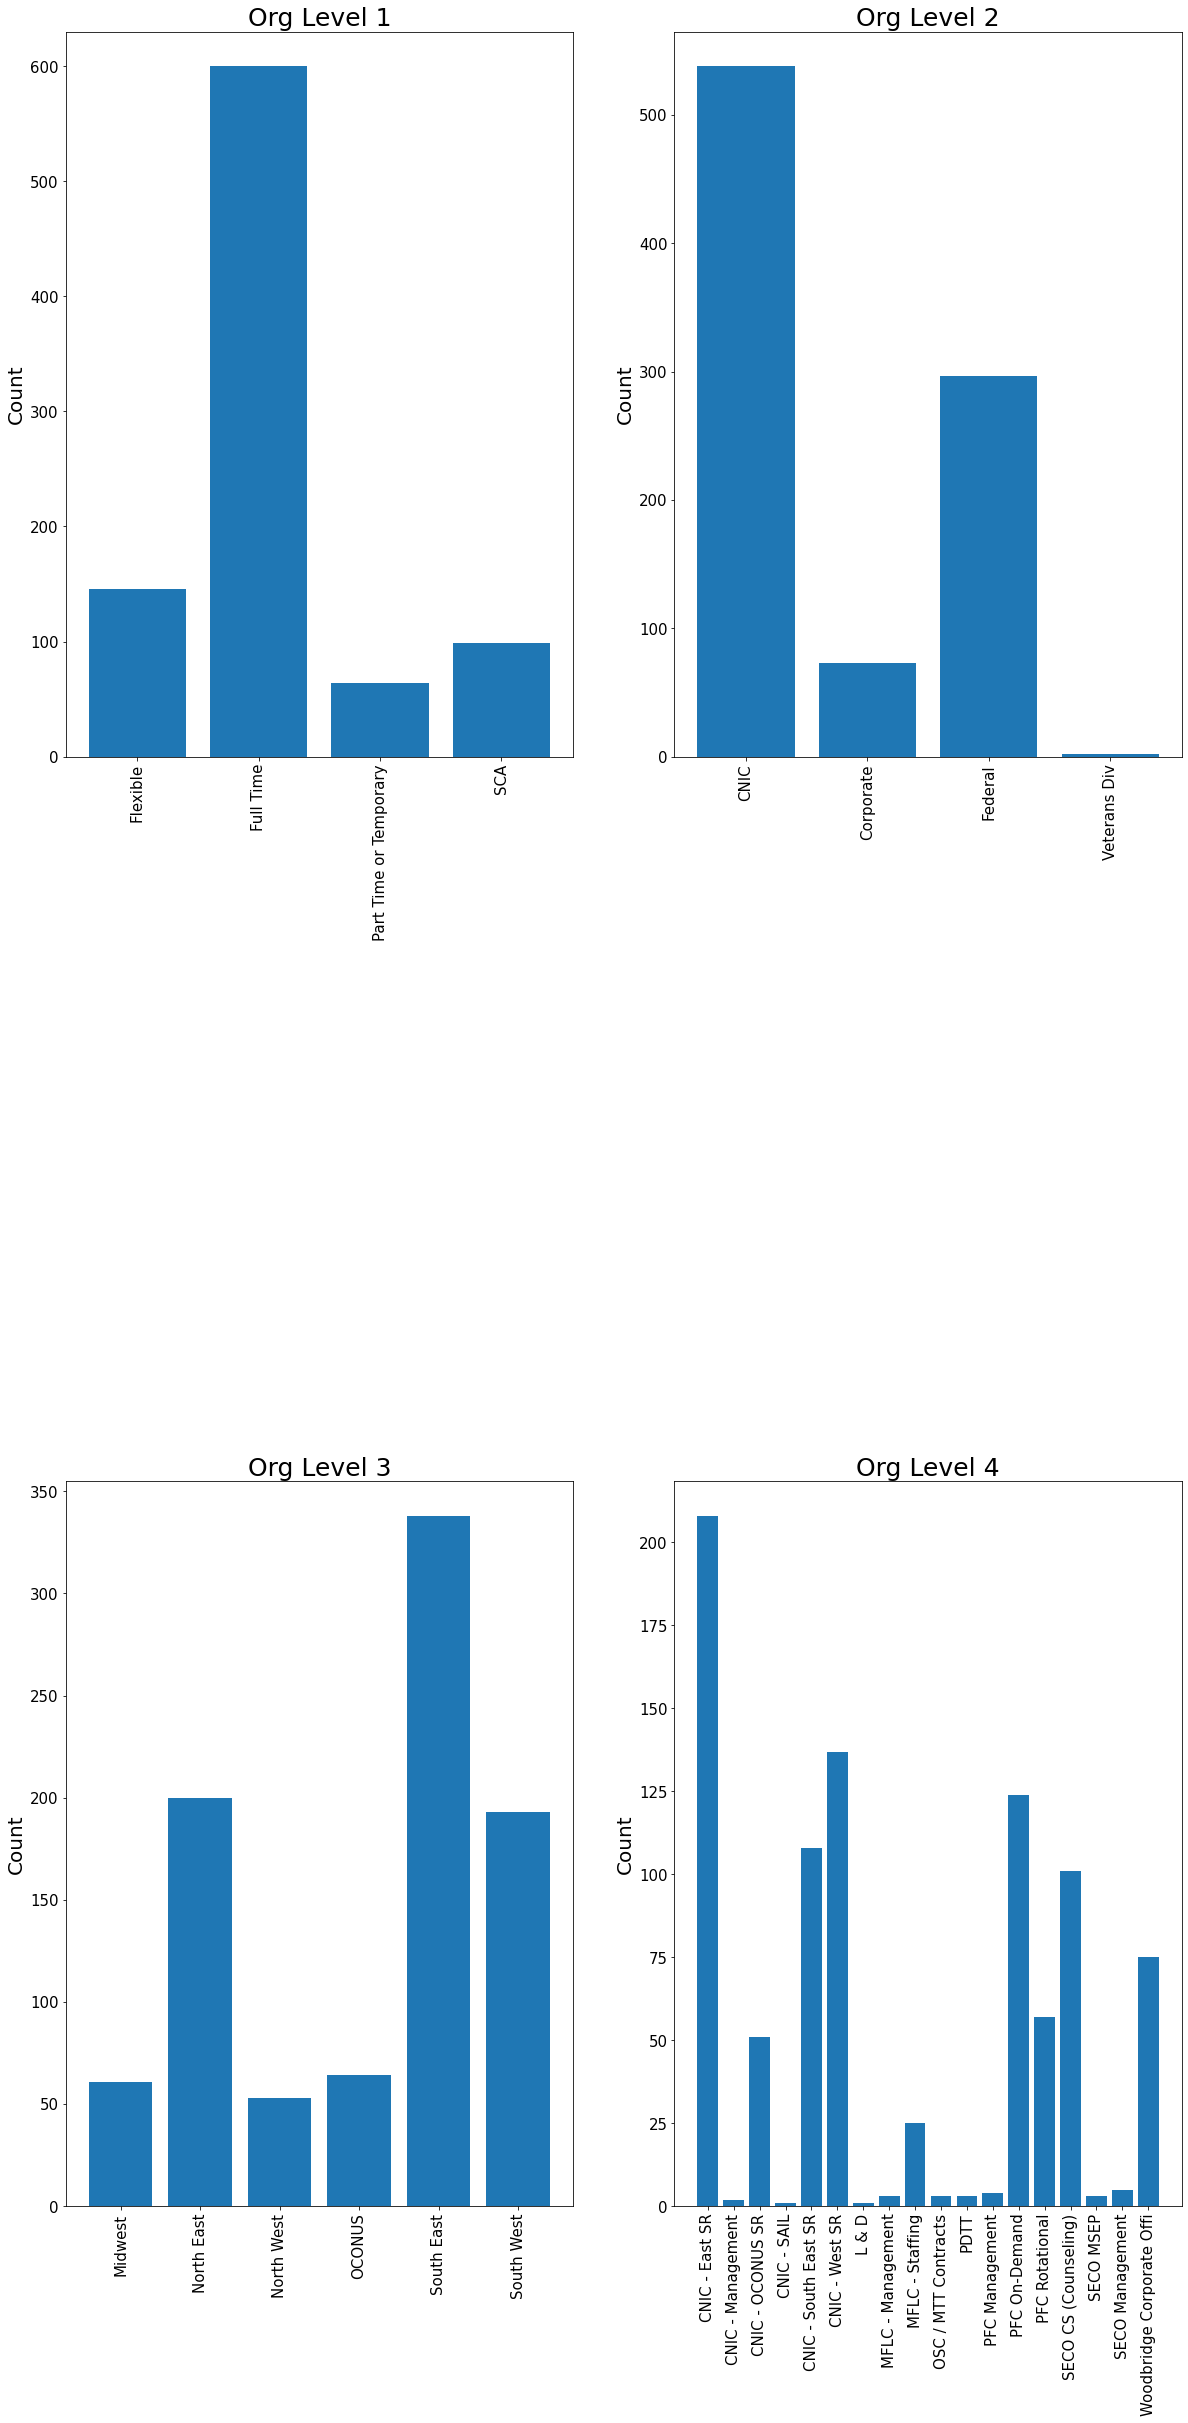

In [47]:
plt.rcParams['figure.figsize'] = (20, 40)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.subplots_adjust(hspace=1)

# make the data read to feed into the visulizer
X_1 = term_data.groupby('Org Level 1').size().reset_index(name='Counts')['Org Level 1']
Y_1 = term_data.groupby('Org Level 1').size().reset_index(name='Counts')['Counts']
axes[0, 0].bar(X_1, Y_1)
axes[0, 0].set_title('Org Level 1', fontsize=25)
axes[0, 0].set_ylabel('Count', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_2 = term_data.groupby('Org Level 2').size().reset_index(name='Counts')['Org Level 2']
Y_2 = term_data.groupby('Org Level 2').size().reset_index(name='Counts')['Counts']
axes[0, 1].bar(X_2, Y_2)
axes[0, 1].set_title('Org Level 2', fontsize=25)
axes[0, 1].set_ylabel('Count', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_3 = term_data.groupby('Org Level 3').size().reset_index(name='Counts')['Org Level 3']
Y_3 = term_data.groupby('Org Level 3').size().reset_index(name='Counts')['Counts']
axes[1, 0].bar(X_3, Y_3)
axes[1, 0].set_title('Org Level 3', fontsize=25)
axes[1, 0].set_ylabel('Count', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_4 = term_data.groupby('Org Level 4').size().reset_index(name='Counts')['Org Level 4']
Y_4 = term_data.groupby('Org Level 4').size().reset_index(name='Counts')['Counts']
axes[1, 1].bar(X_4, Y_4)
axes[1, 1].set_title('Org Level 4', fontsize=25)
axes[1, 1].set_ylabel('Count', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].tick_params(axis='x', rotation = 90)

plt.savefig('term_data_2c')

### Active Employee Visualizations

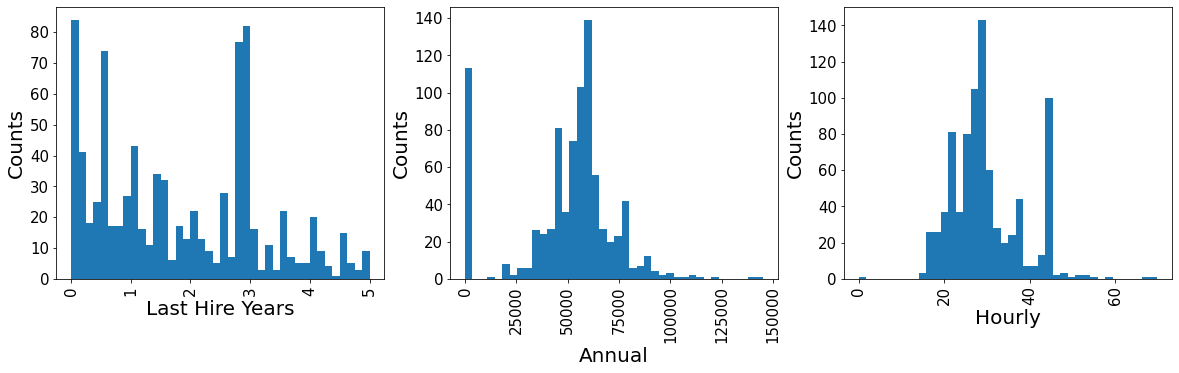

In [48]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 5)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3)

# Specify the features of interest
num_features = ['Last Hire Years','Annual','Hourly']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(active_data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    ax.tick_params(axis='x', rotation = 90)
#plt.show()
plt.savefig('active_data_1')

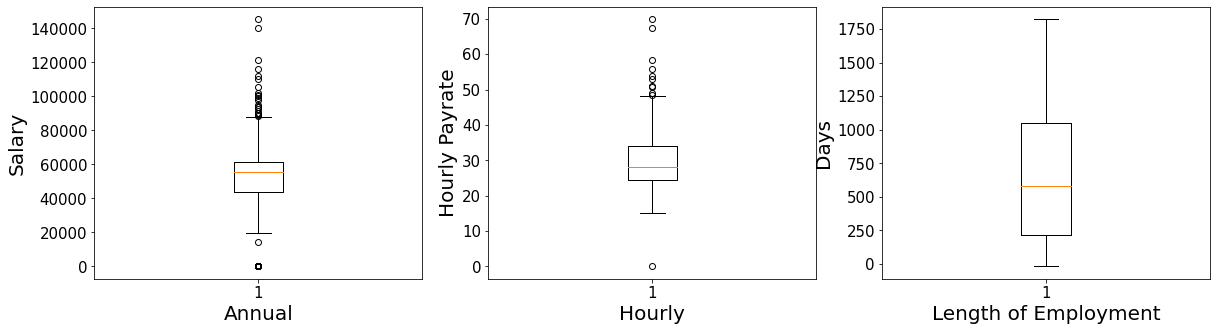

In [49]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 5)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3)

# Specify the features of interest
num_features = ['Annual','Hourly', 'Length of Employment']
xaxes = num_features
yaxes = ['Salary', 'Hourly Payrate', 'Days']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.boxplot(active_data[num_features[idx]])
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
#plt.show()
plt.savefig('active_box')

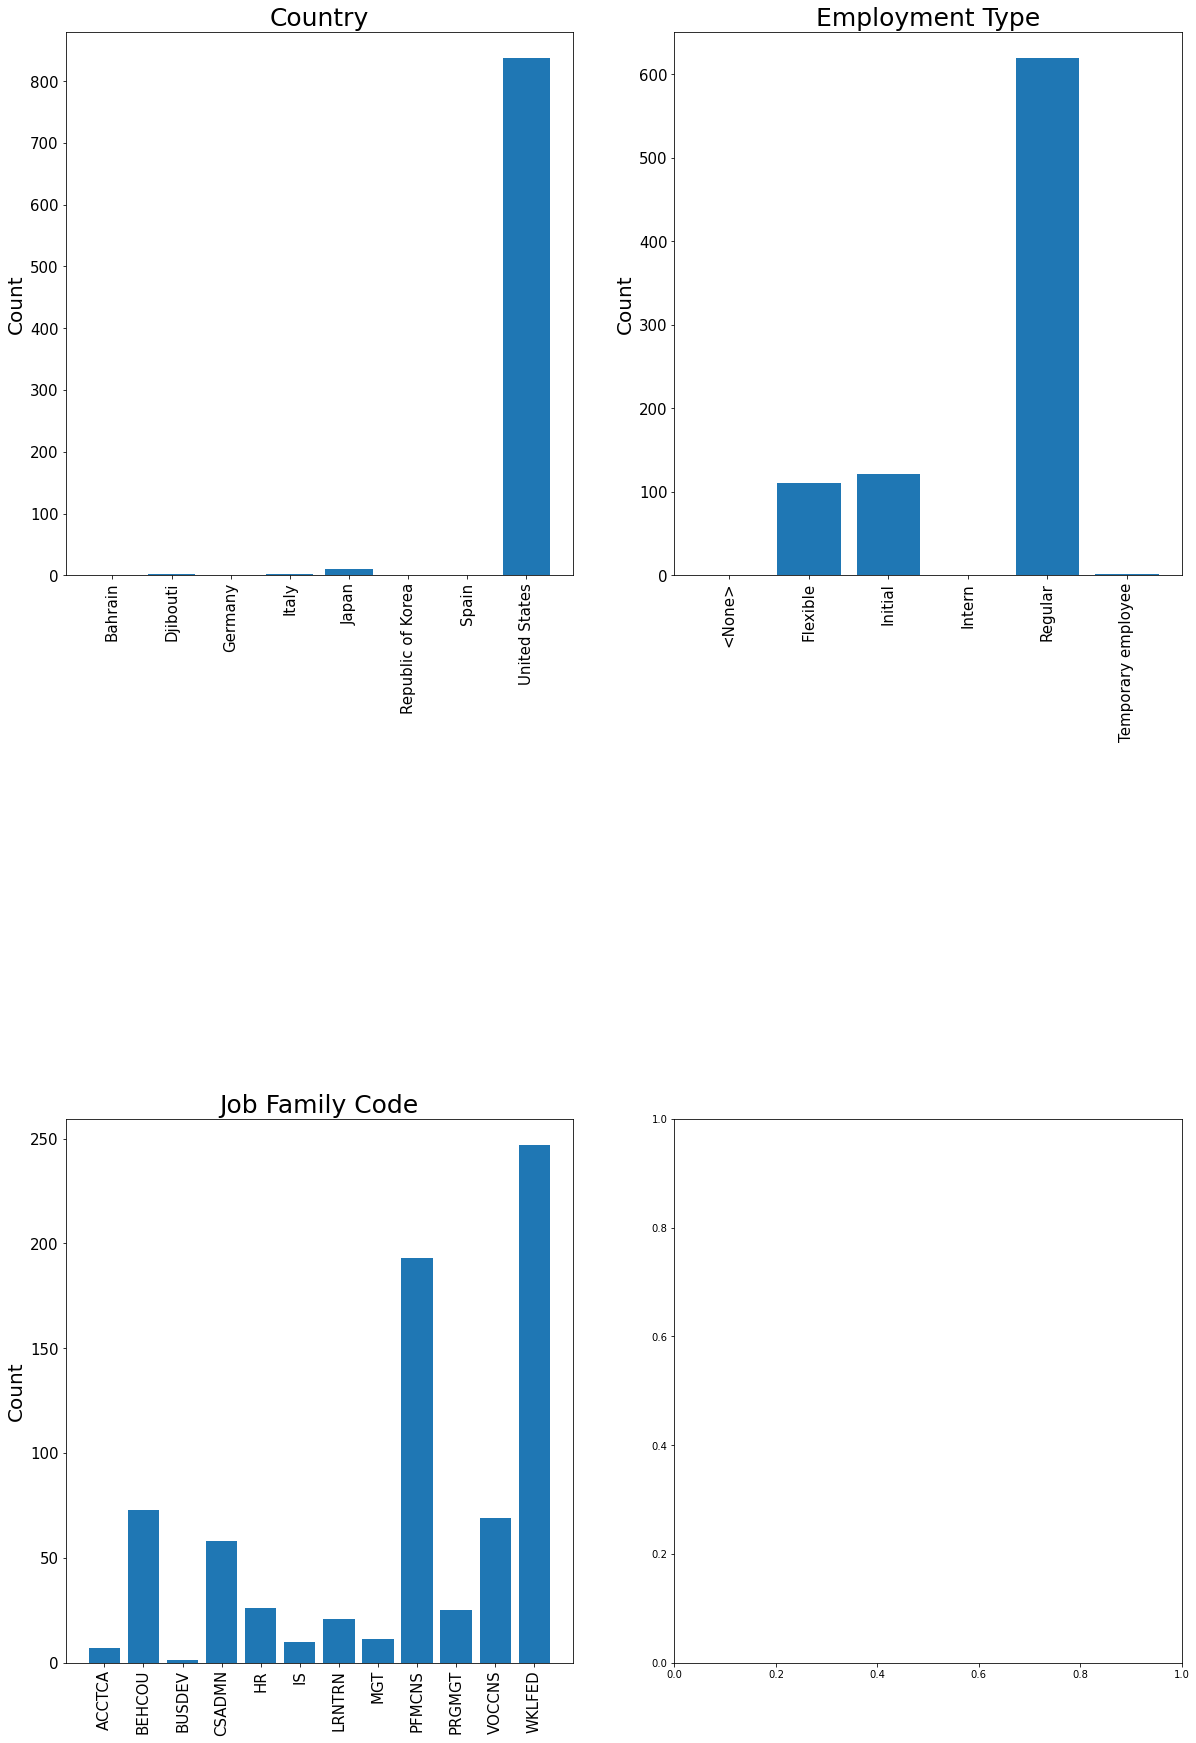

In [50]:
plt.rcParams['figure.figsize'] = (20, 30)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.subplots_adjust(hspace=1)

# make the data read to feed into the visulizer
X_Country = active_data.groupby('Country').size().reset_index(name='Counts')['Country']
Y_Country = active_data.groupby('Country').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Country, Y_Country)
axes[0, 0].set_title('Country', fontsize=25)
axes[0, 0].set_ylabel('Count', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_Type = active_data.groupby('Employment Type').size().reset_index(name='Counts')['Employment Type']
Y_Type = active_data.groupby('Employment Type').size().reset_index(name='Counts')['Counts']
axes[0, 1].bar(X_Type, Y_Type)
axes[0, 1].set_title('Employment Type', fontsize=25)
axes[0, 1].set_ylabel('Count', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_Job = active_data.groupby('Job Family Code').size().reset_index(name='Counts')['Job Family Code']
Y_Job = active_data.groupby('Job Family Code').size().reset_index(name='Counts')['Counts']
axes[1, 0].bar(X_Job, Y_Job)
axes[1, 0].set_title('Job Family Code', fontsize=25)
axes[1, 0].set_ylabel('Count', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].tick_params(axis='x', rotation = 90)


plt.savefig('active_data_2a')

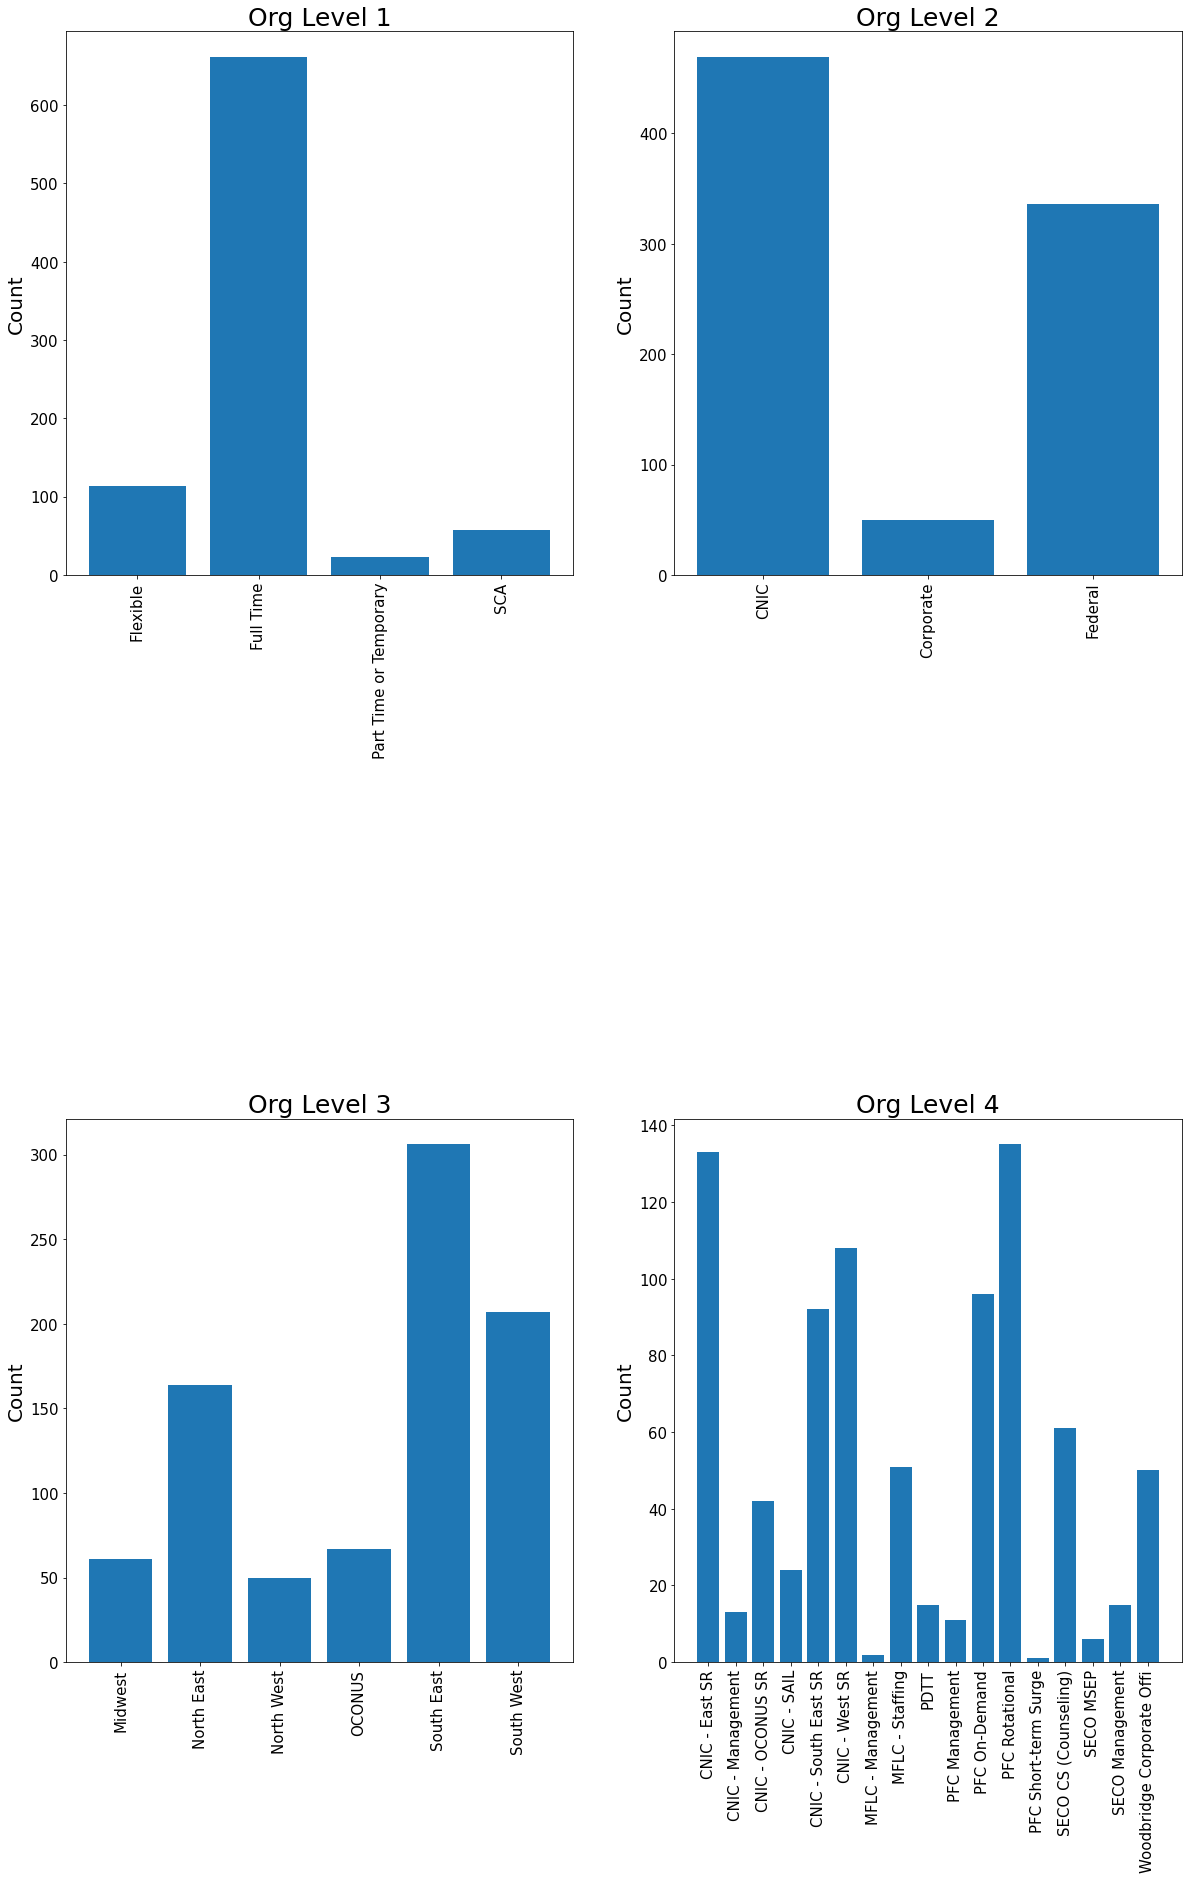

In [51]:
plt.rcParams['figure.figsize'] = (20, 30)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.subplots_adjust(hspace=1)


# make the data read to feed into the visulizer
X_1 = active_data.groupby('Org Level 1').size().reset_index(name='Counts')['Org Level 1']
Y_1 = active_data.groupby('Org Level 1').size().reset_index(name='Counts')['Counts']
axes[0, 0].bar(X_1, Y_1)
axes[0, 0].set_title('Org Level 1', fontsize=25)
axes[0, 0].set_ylabel('Count', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_2 = active_data.groupby('Org Level 2').size().reset_index(name='Counts')['Org Level 2']
Y_2 = active_data.groupby('Org Level 2').size().reset_index(name='Counts')['Counts']
axes[0, 1].bar(X_2, Y_2)
axes[0, 1].set_title('Org Level 2', fontsize=25)
axes[0, 1].set_ylabel('Count', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_3 = active_data.groupby('Org Level 3').size().reset_index(name='Counts')['Org Level 3']
Y_3 = active_data.groupby('Org Level 3').size().reset_index(name='Counts')['Counts']
axes[1, 0].bar(X_3, Y_3)
axes[1, 0].set_title('Org Level 3', fontsize=25)
axes[1, 0].set_ylabel('Count', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_4 = active_data.groupby('Org Level 4').size().reset_index(name='Counts')['Org Level 4']
Y_4 = active_data.groupby('Org Level 4').size().reset_index(name='Counts')['Counts']
axes[1, 1].bar(X_4, Y_4)
axes[1, 1].set_title('Org Level 4', fontsize=25)
axes[1, 1].set_ylabel('Count', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].tick_params(axis='x', rotation = 90)

plt.savefig('active_data_2b')

### Intial/New Hire Employee Visualizations

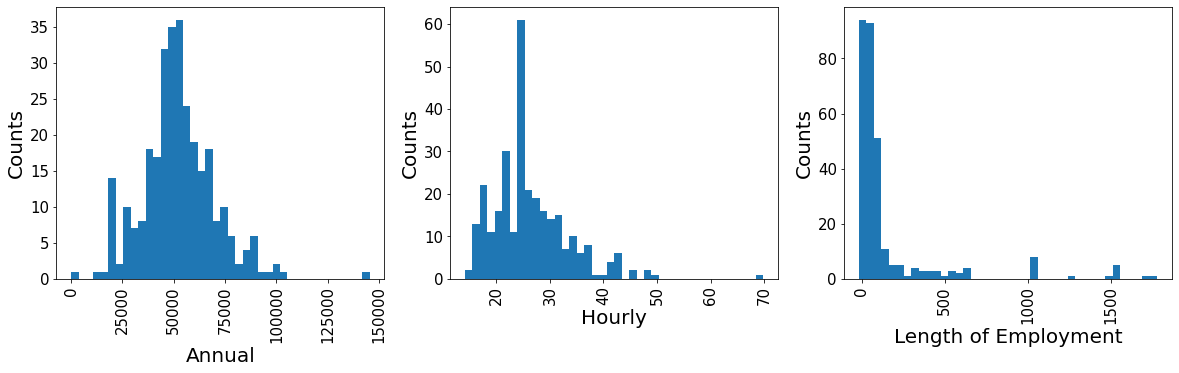

In [52]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 5)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3)

# Specify the features of interest
num_features = ['Annual','Hourly', 'Length of Employment']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(new_data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    ax.tick_params(axis='x', rotation = 90)
#plt.show()
plt.savefig('new_data_1')

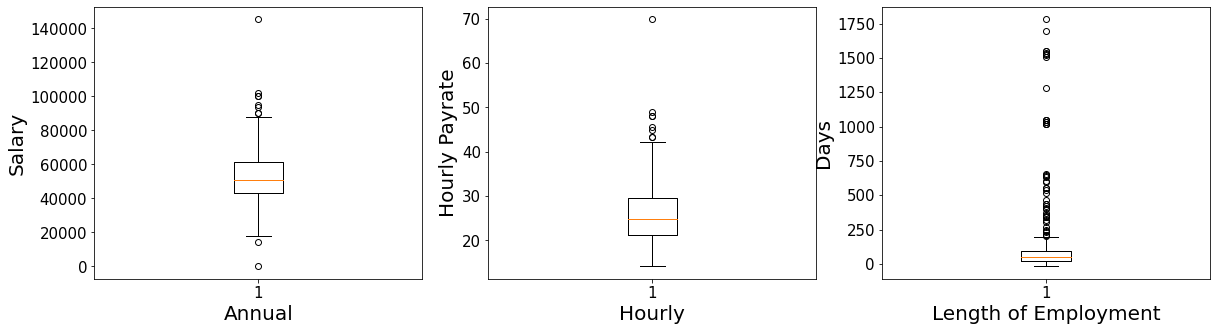

In [53]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 5)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3)

# Specify the features of interest
num_features = ['Annual','Hourly', 'Length of Employment']
xaxes = num_features
yaxes = ['Salary', 'Hourly Payrate', 'Days']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.boxplot(new_data[num_features[idx]])
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

plt.savefig('new_box')

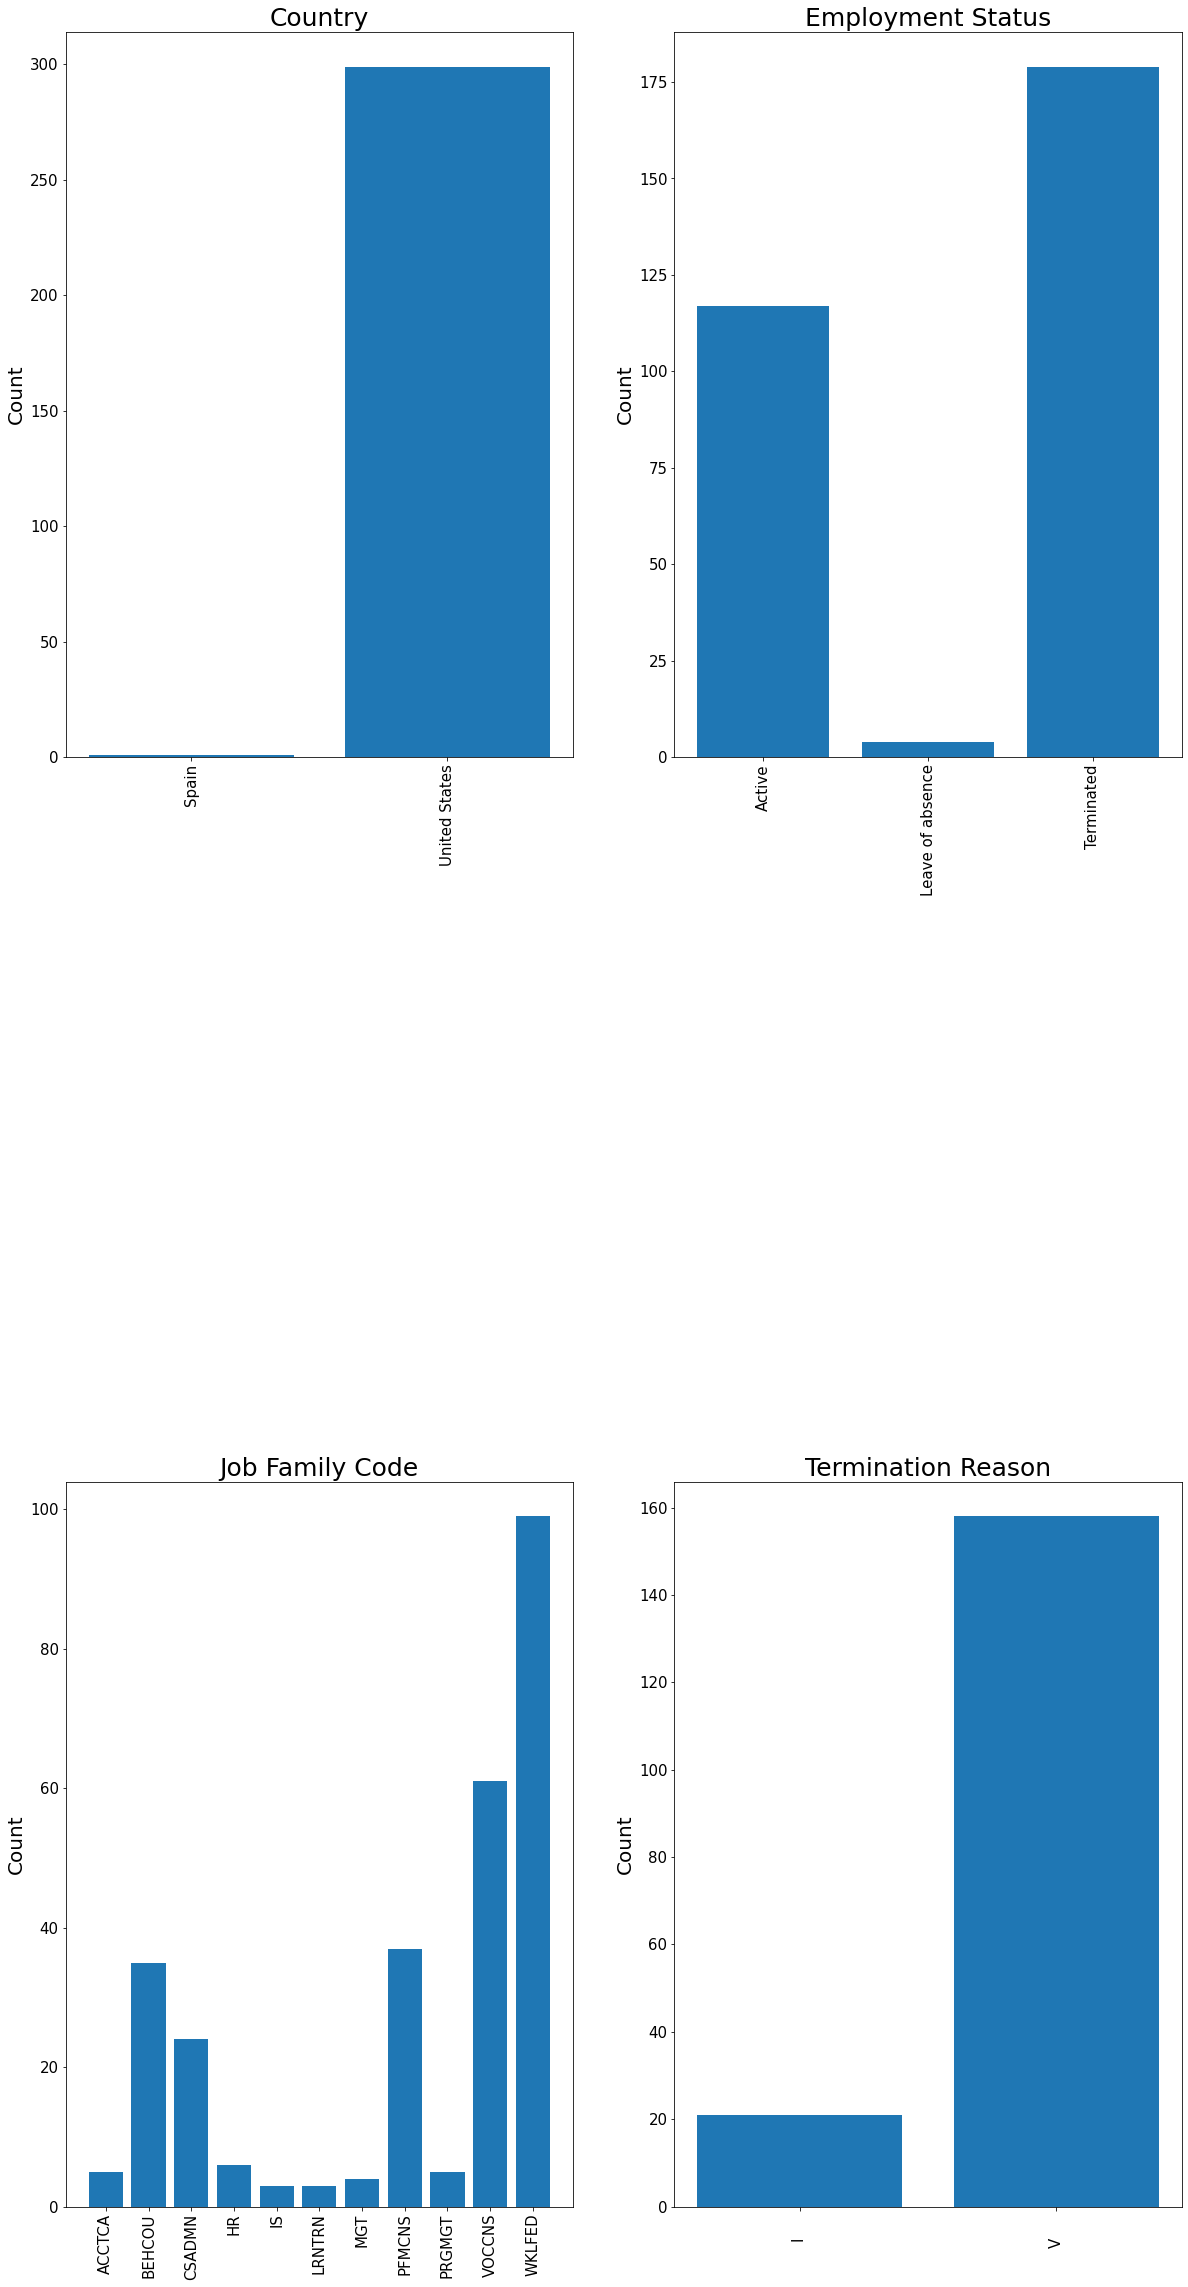

In [54]:
plt.rcParams['figure.figsize'] = (20, 40)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.subplots_adjust(hspace=1)

# make the data read to feed into the visulizer
X_Country = new_data.groupby('Country').size().reset_index(name='Counts')['Country']
Y_Country = new_data.groupby('Country').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Country, Y_Country)
axes[0, 0].set_title('Country', fontsize=25)
axes[0, 0].set_ylabel('Count', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].tick_params(axis='x', rotation = 90)


# make the data read to feed into the visulizer
X_Type = new_data.groupby('Employment Status').size().reset_index(name='Counts')['Employment Status']
Y_Type = new_data.groupby('Employment Status').size().reset_index(name='Counts')['Counts']
axes[0, 1].bar(X_Type, Y_Type)
axes[0, 1].set_title('Employment Status', fontsize=25)
axes[0, 1].set_ylabel('Count', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_Job = new_data.groupby('Job Family Code').size().reset_index(name='Counts')['Job Family Code']
Y_Job = new_data.groupby('Job Family Code').size().reset_index(name='Counts')['Counts']
axes[1, 0].bar(X_Job, Y_Job)
axes[1, 0].set_title('Job Family Code', fontsize=25)
axes[1, 0].set_ylabel('Count', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_TerminationC = new_data.groupby('Termination Type Code').size().reset_index(name='Counts')['Termination Type Code']
Y_TerminationC = new_data.groupby('Termination Type Code').size().reset_index(name='Counts')['Counts']
axes[1, 1].bar(X_TerminationC, Y_TerminationC)
axes[1, 1].set_title('Termination Reason', fontsize=25)
axes[1, 1].set_ylabel('Count', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].tick_params(axis='x', rotation = 90)



#plt.show()
plt.savefig('new_data_2a')

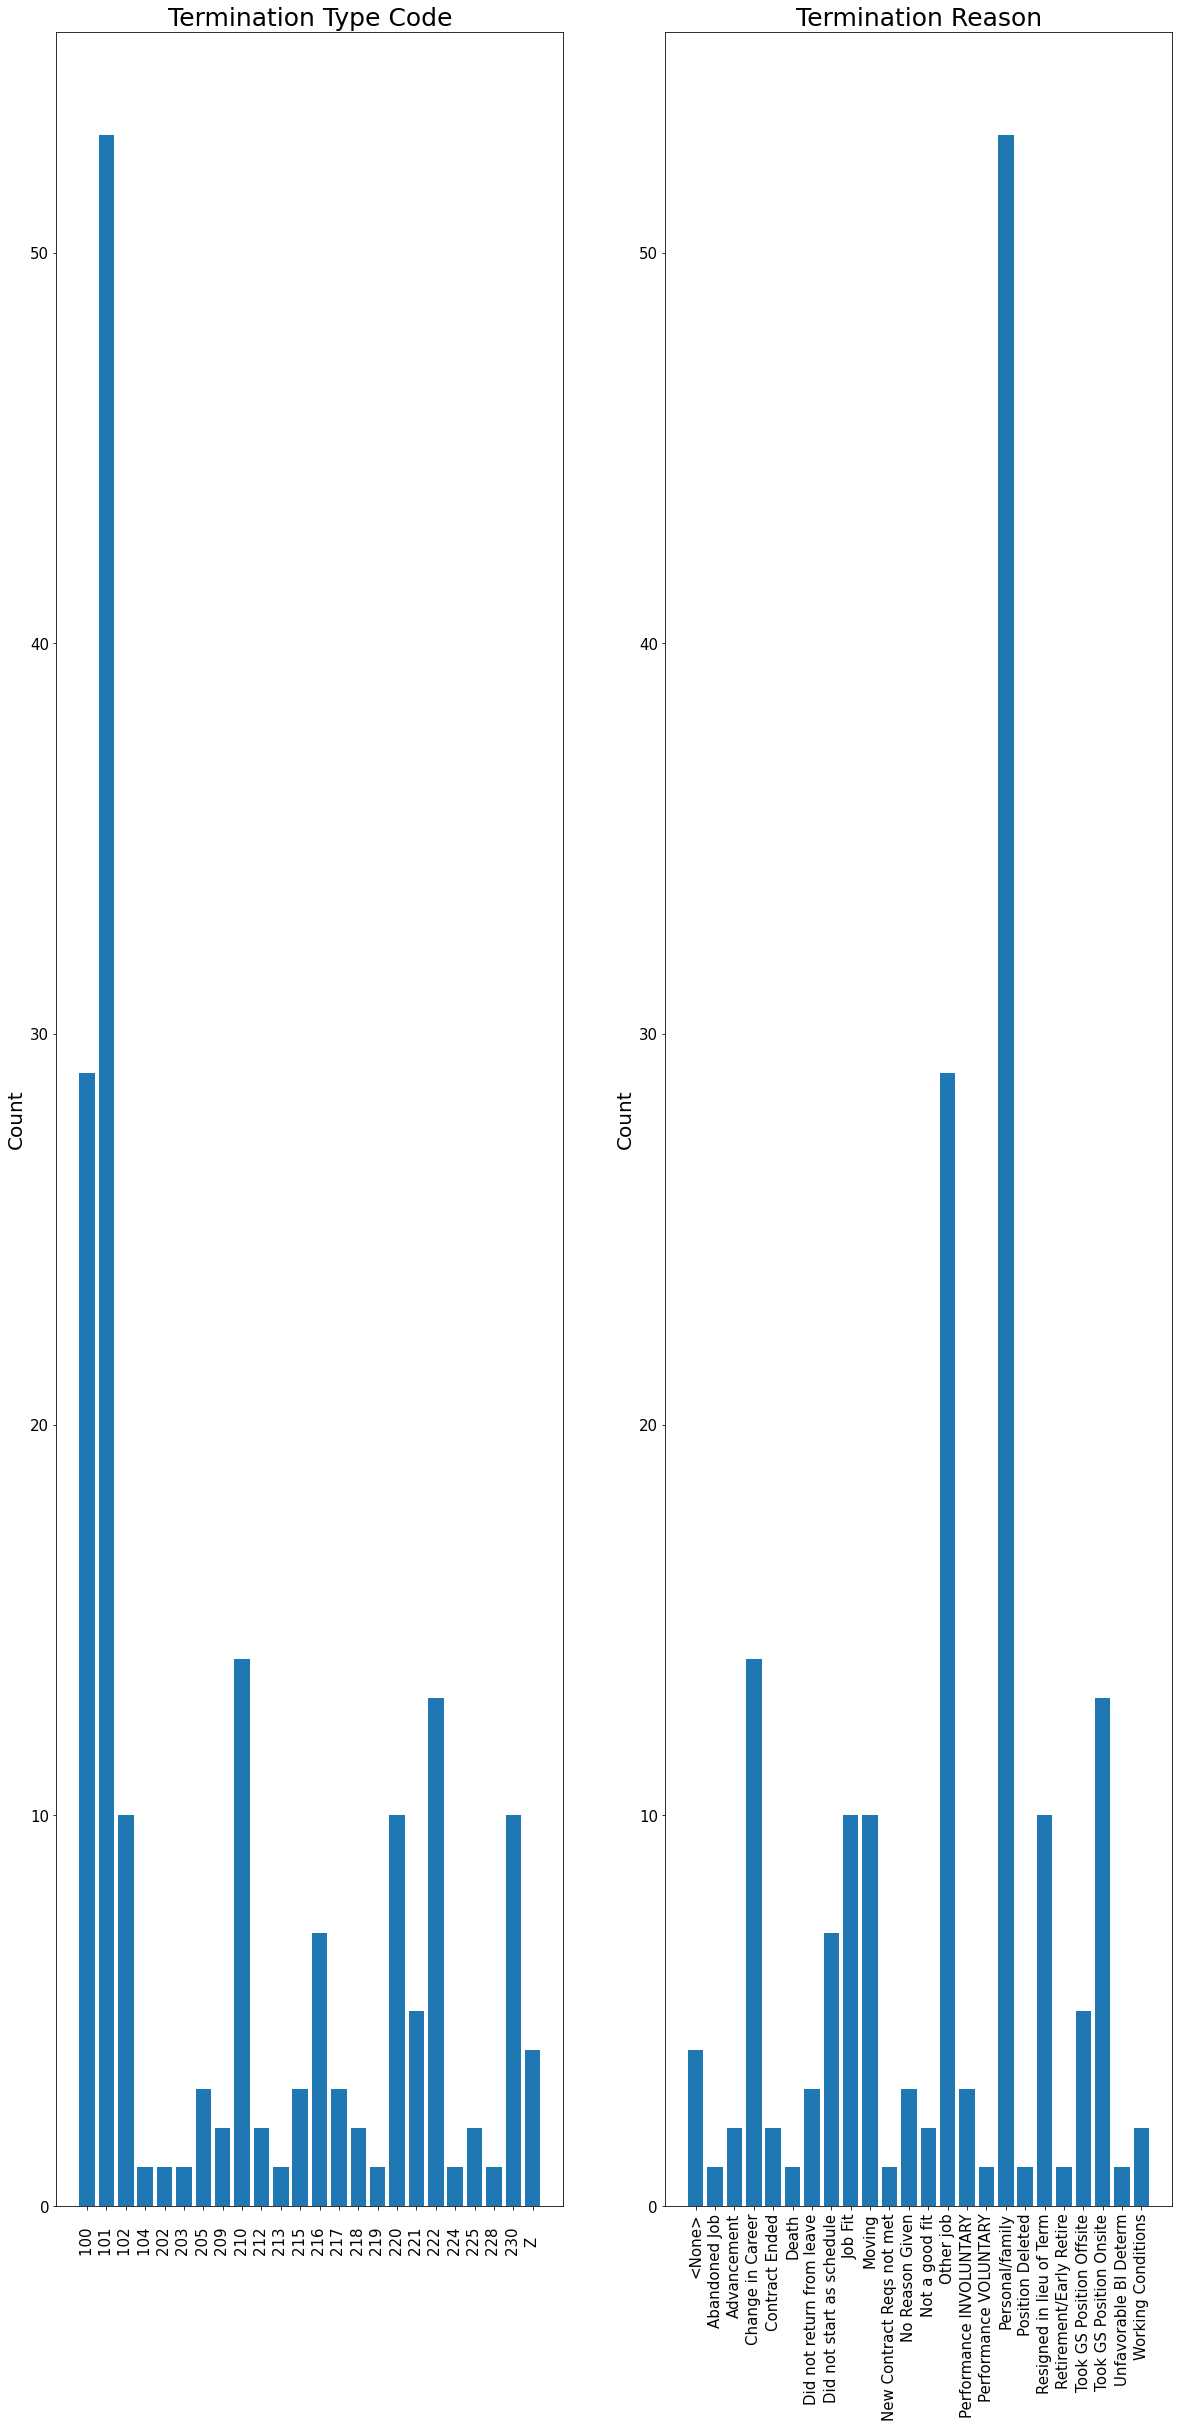

In [56]:
plt.rcParams['figure.figsize'] = (20, 40)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.subplots_adjust(hspace=1)

# make the data read to feed into the visulizer
X_TerminationCode = new_data.groupby('Termination Reason Code').size().reset_index(name='Counts')['Termination Reason Code']
Y_TerminationCode = new_data.groupby('Termination Reason Code').size().reset_index(name='Counts')['Counts']
axes[0].bar(X_TerminationCode, Y_TerminationCode)
axes[0].set_title('Termination Type Code', fontsize=25)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_Termination = new_data.groupby('Termination Reason').size().reset_index(name='Counts')['Termination Reason']
Y_Termination = new_data.groupby('Termination Reason').size().reset_index(name='Counts')['Counts']
axes[1].bar(X_Termination, Y_Termination)
axes[1].set_title('Termination Reason', fontsize=25)
axes[1].set_ylabel('Count', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].tick_params(axis='x', rotation = 90)


#plt.show()
plt.savefig('new_data_2b')

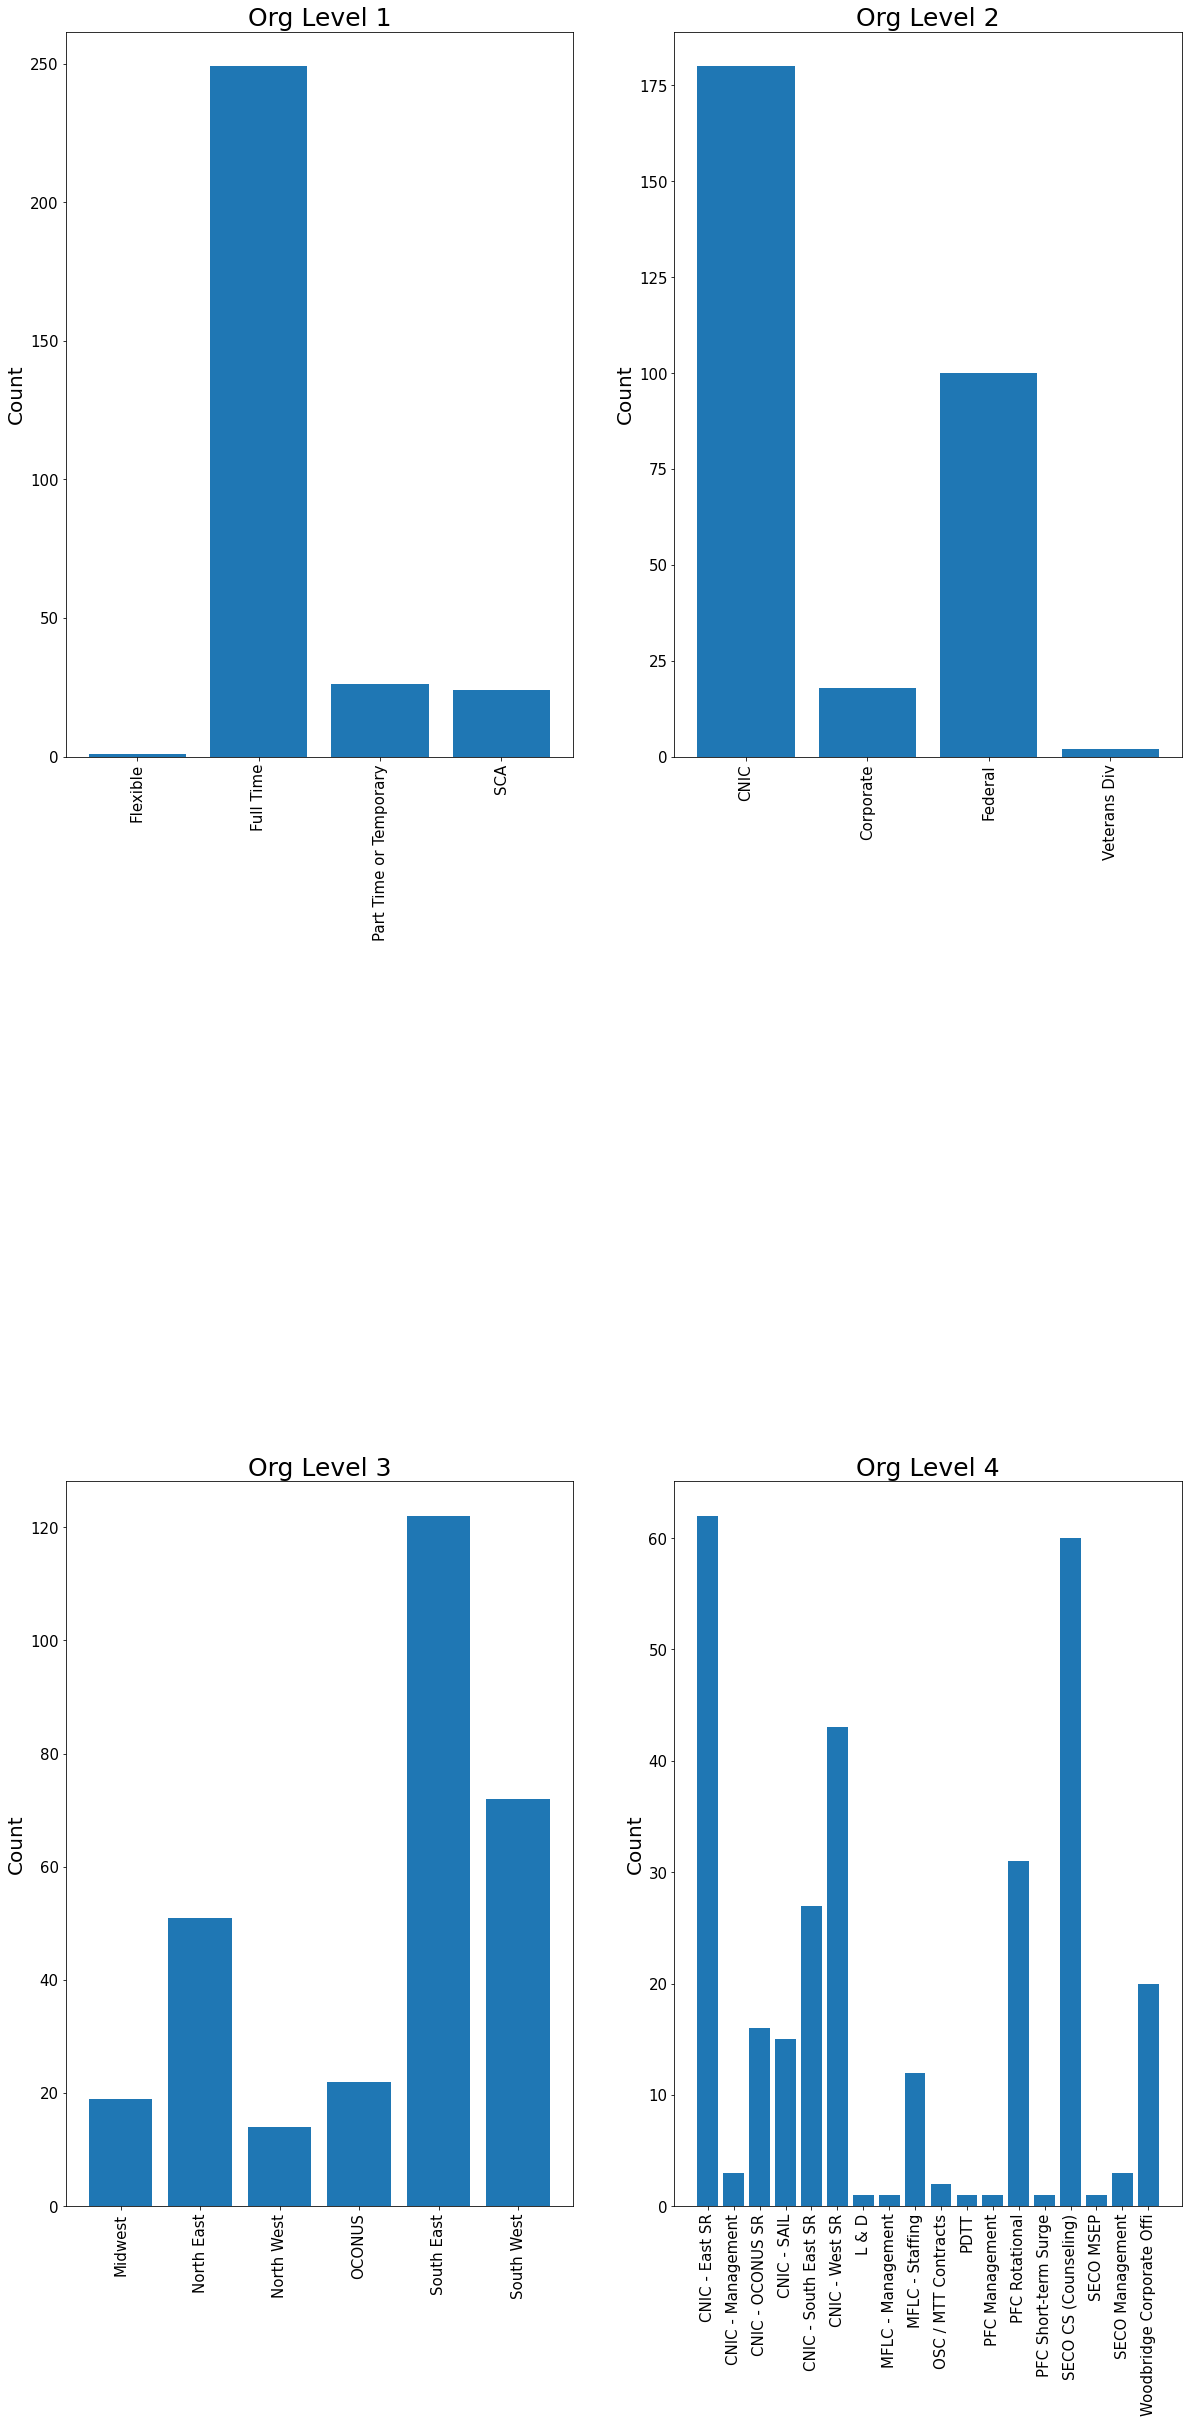

In [59]:
plt.rcParams['figure.figsize'] = (20, 40)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.subplots_adjust(hspace=1)


# make the data read to feed into the visulizer
X_1 = new_data.groupby('Org Level 1').size().reset_index(name='Counts')['Org Level 1']
Y_1 = new_data.groupby('Org Level 1').size().reset_index(name='Counts')['Counts']
axes[0, 0].bar(X_1, Y_1)
axes[0, 0].set_title('Org Level 1', fontsize=25)
axes[0, 0].set_ylabel('Count', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_2 = new_data.groupby('Org Level 2').size().reset_index(name='Counts')['Org Level 2']
Y_2 = new_data.groupby('Org Level 2').size().reset_index(name='Counts')['Counts']
axes[0, 1].bar(X_2, Y_2)
axes[0, 1].set_title('Org Level 2', fontsize=25)
axes[0, 1].set_ylabel('Count', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_3 = new_data.groupby('Org Level 3').size().reset_index(name='Counts')['Org Level 3']
Y_3 = new_data.groupby('Org Level 3').size().reset_index(name='Counts')['Counts']
axes[1, 0].bar(X_3, Y_3)
axes[1, 0].set_title('Org Level 3', fontsize=25)
axes[1, 0].set_ylabel('Count', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_4 = new_data.groupby('Org Level 4').size().reset_index(name='Counts')['Org Level 4']
Y_4 = new_data.groupby('Org Level 4').size().reset_index(name='Counts')['Counts']
axes[1, 1].bar(X_4, Y_4)
axes[1, 1].set_title('Org Level 4', fontsize=25)
axes[1, 1].set_ylabel('Count', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].tick_params(axis='x', rotation = 90)


#plt.show()
plt.savefig('new_data_2c')

---
---

### Country for all data sets

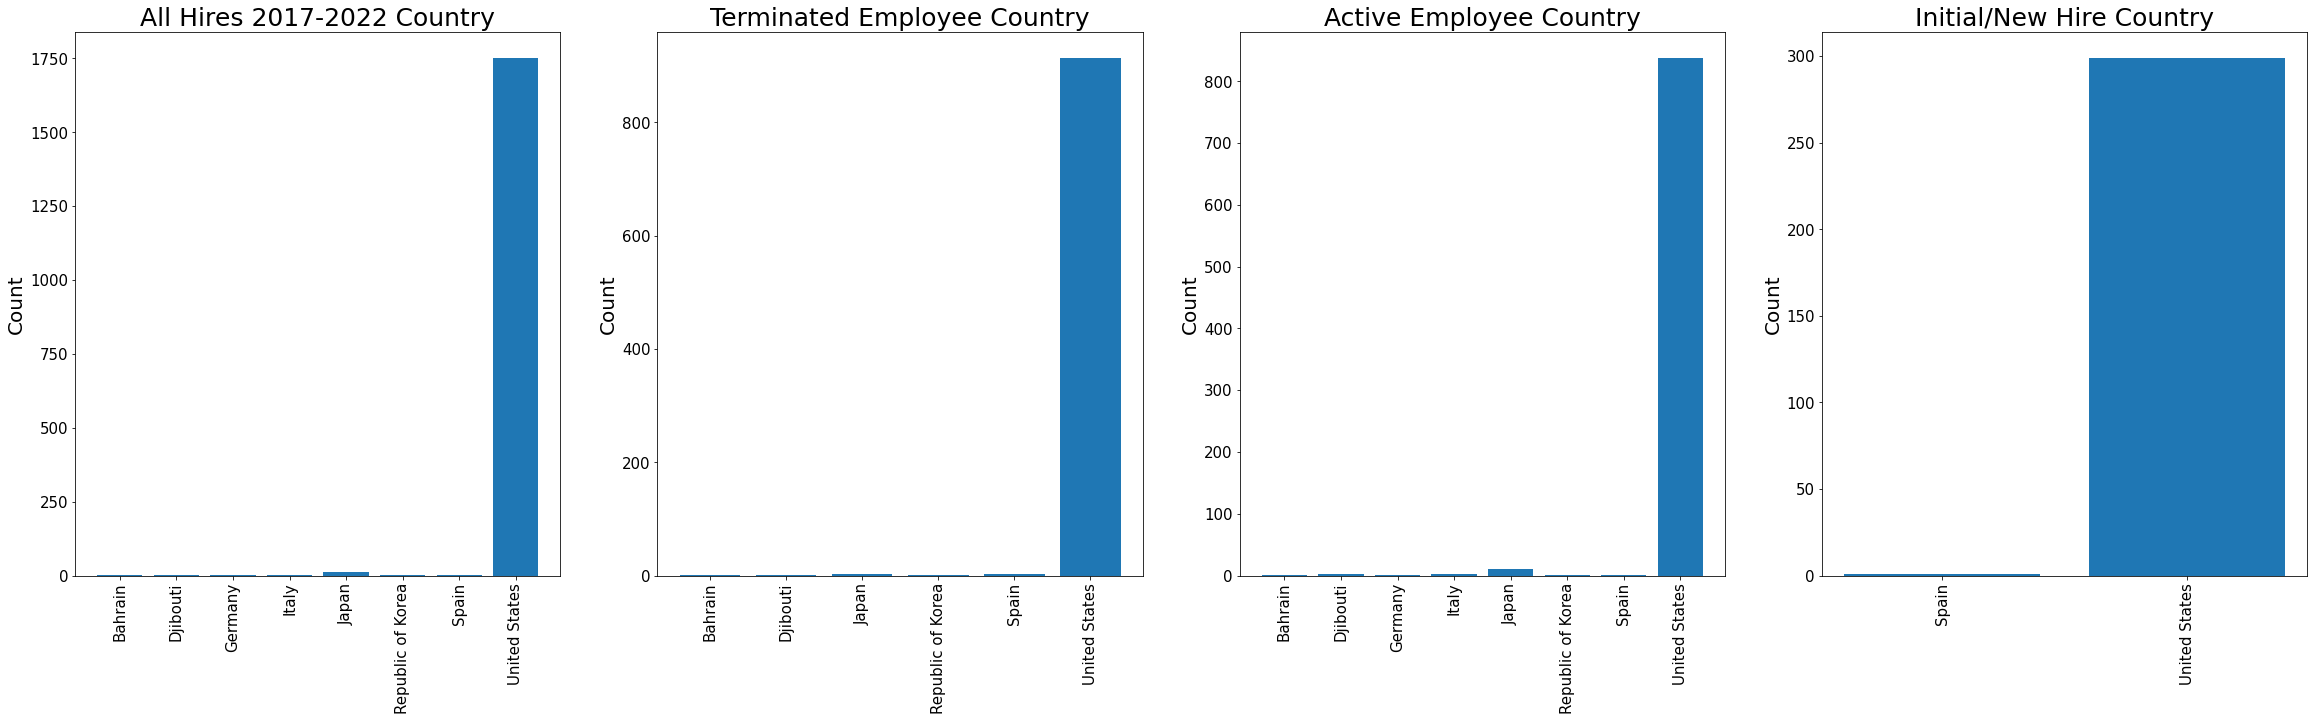

In [60]:
plt.rcParams['figure.figsize'] = (40, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 4)
fig.subplots_adjust(hspace=1)

# make the data read to feed into the visulizer
X_Country = data.groupby('Country').size().reset_index(name='Counts')['Country']
Y_Country = data.groupby('Country').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0].bar(X_Country, Y_Country)
axes[0].set_title('All Hires 2017-2022 Country', fontsize=25)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].tick_params(axis='x', rotation = 90)

X_TCountry = term_data.groupby('Country').size().reset_index(name='Counts')['Country']
Y_TCountry = term_data.groupby('Country').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1].bar(X_TCountry, Y_TCountry)
axes[1].set_title('Terminated Employee Country', fontsize=25)
axes[1].set_ylabel('Count', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].tick_params(axis='x', rotation = 90)

X_ACountry = active_data.groupby('Country').size().reset_index(name='Counts')['Country']
Y_ACountry = active_data.groupby('Country').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[2].bar(X_ACountry, Y_ACountry)
axes[2].set_title('Active Employee Country', fontsize=25)
axes[2].set_ylabel('Count', fontsize=20)
axes[2].tick_params(axis='both', labelsize=15)
axes[2].tick_params(axis='x', rotation = 90)

X_NCountry = new_data.groupby('Country').size().reset_index(name='Counts')['Country']
Y_NCountry = new_data.groupby('Country').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[3].bar(X_NCountry, Y_NCountry)
axes[3].set_title('Initial/New Hire Country', fontsize=25)
axes[3].set_ylabel('Count', fontsize=20)
axes[3].tick_params(axis='both', labelsize=15)
axes[3].tick_params(axis='x', rotation = 90)

#plt.show()
plt.savefig('all_country')

### Employment Status for all complete and Intial data sets

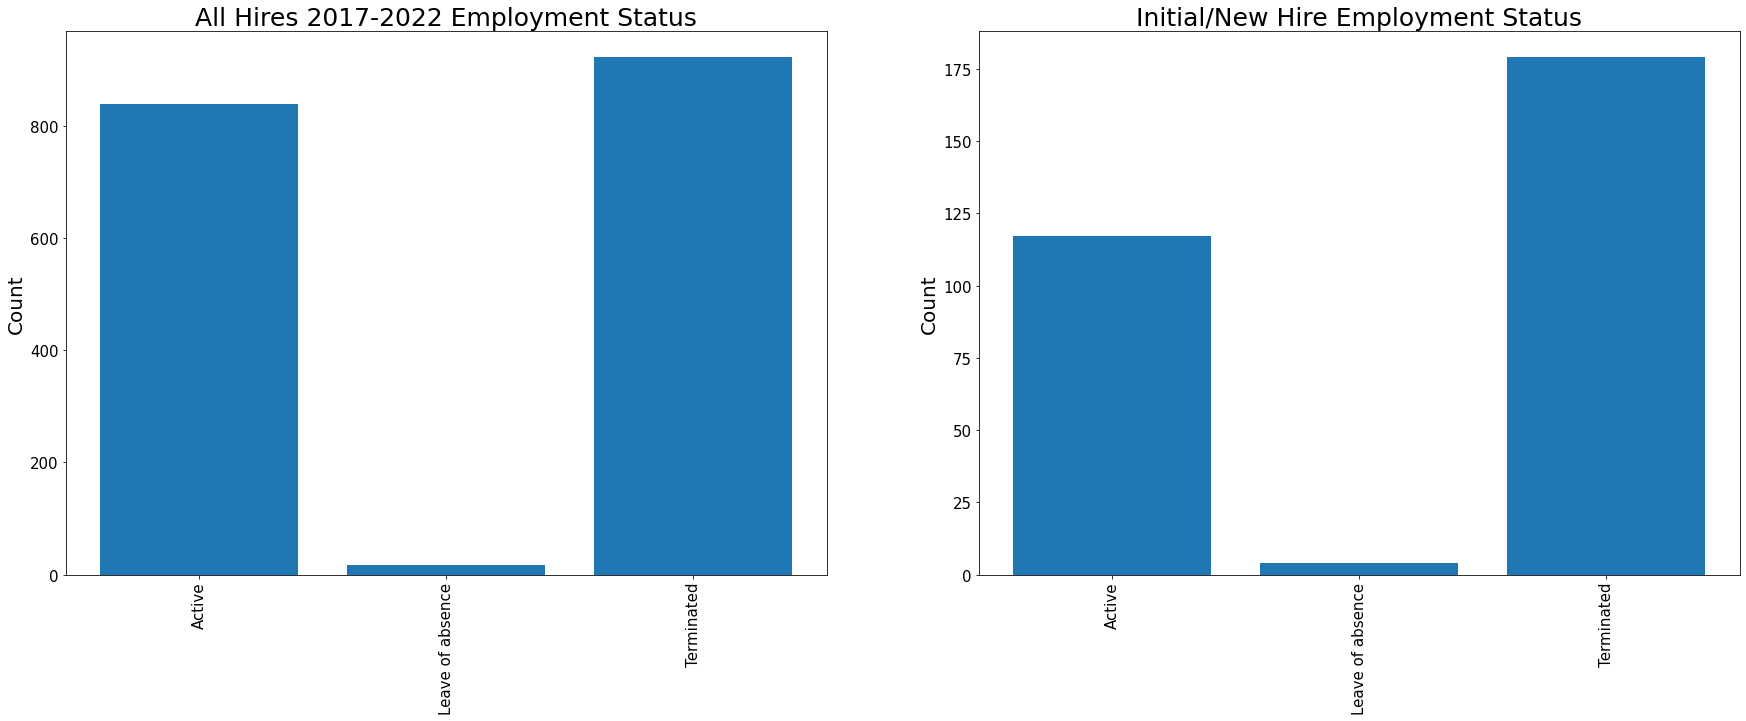

In [61]:
plt.rcParams['figure.figsize'] = (30, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.subplots_adjust(hspace=1)

# make the data read to feed into the visulizer
X_Employment = data.groupby('Employment Status').size().reset_index(name='Counts')['Employment Status']
Y_Employment = data.groupby('Employment Status').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0].bar(X_Employment, Y_Employment)
axes[0].set_title('All Hires 2017-2022 Employment Status', fontsize=25)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].tick_params(axis='x', rotation = 90)

X_NEmployment = new_data.groupby('Employment Status').size().reset_index(name='Counts')['Employment Status']
Y_NEmployment = new_data.groupby('Employment Status').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1].bar(X_NEmployment, Y_NEmployment)
axes[1].set_title('Initial/New Hire Employment Status', fontsize=25)
axes[1].set_ylabel('Count', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].tick_params(axis='x', rotation = 90)

#plt.show()
plt.savefig('an_employment')

### Employment Type for all Hires, Terminated and Active Employees

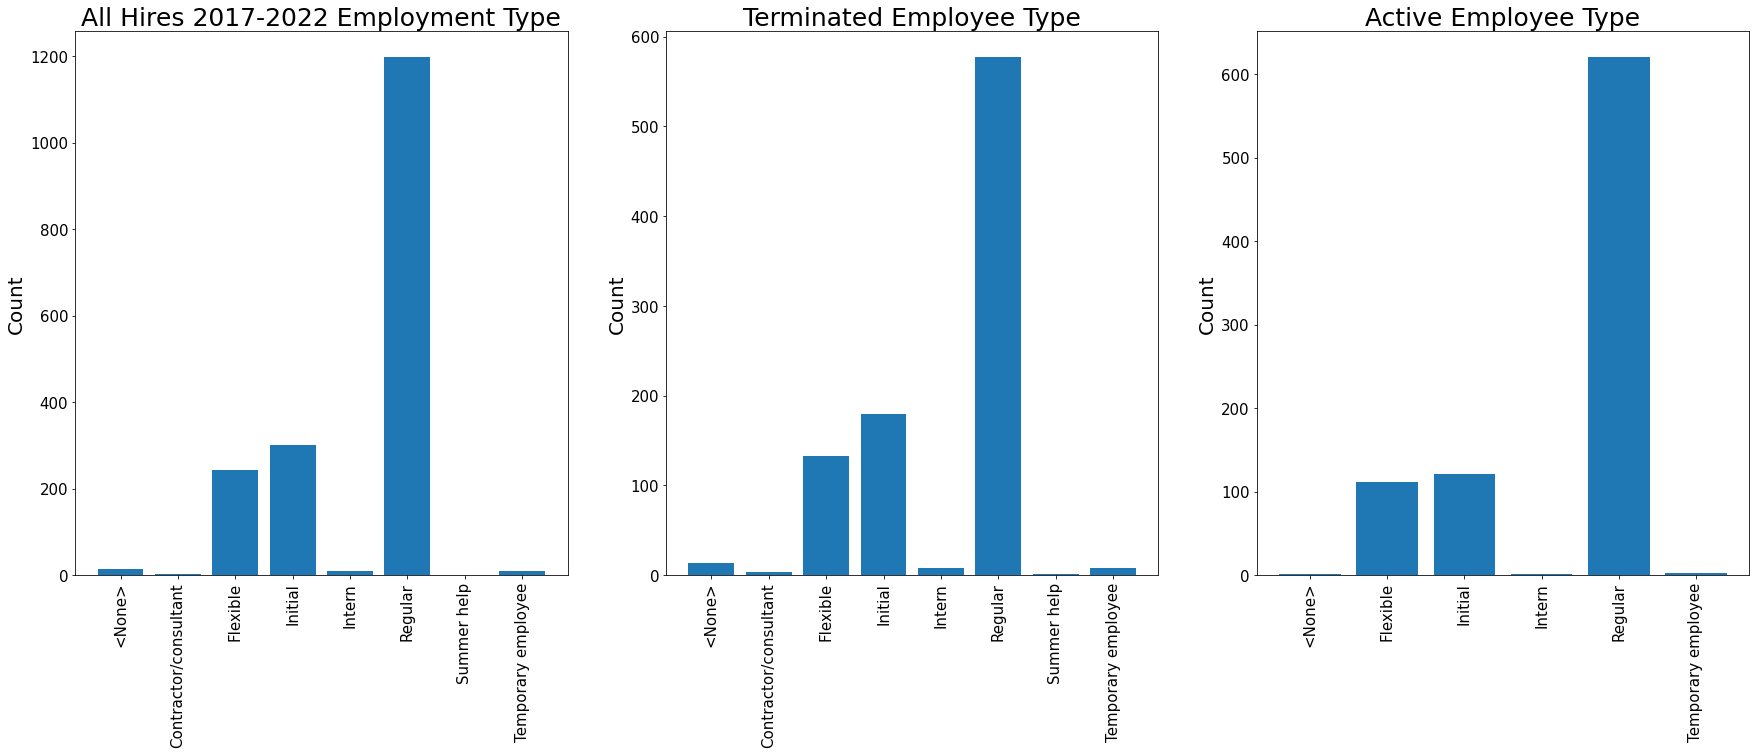

In [62]:
plt.rcParams['figure.figsize'] = (30, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3)
fig.subplots_adjust(hspace=1)

# make the data read to feed into the visulizer
X_EmploymentType = data.groupby('Employment Type').size().reset_index(name='Counts')['Employment Type']
Y_EmploymentType = data.groupby('Employment Type').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0].bar(X_EmploymentType, Y_EmploymentType)
axes[0].set_title('All Hires 2017-2022 Employment Type', fontsize=25)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_TEmployment = term_data.groupby('Employment Type').size().reset_index(name='Counts')['Employment Type']
Y_TEmployment = term_data.groupby('Employment Type').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1].bar(X_TEmployment, Y_TEmployment)
axes[1].set_title('Terminated Employee Type', fontsize=25)
axes[1].set_ylabel('Count', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].tick_params(axis='x', rotation = 90)

X_AEmployment = active_data.groupby('Employment Type').size().reset_index(name='Counts')['Employment Type']
Y_AEmployment = active_data.groupby('Employment Type').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[2].bar(X_AEmployment, Y_AEmployment)
axes[2].set_title('Active Employee Type', fontsize=25)
axes[2].set_ylabel('Count', fontsize=20)
axes[2].tick_params(axis='both', labelsize=15)
axes[2].tick_params(axis='x', rotation = 90)

#plt.show()
plt.savefig('ta_employment')


### Job Family Code for all data sets

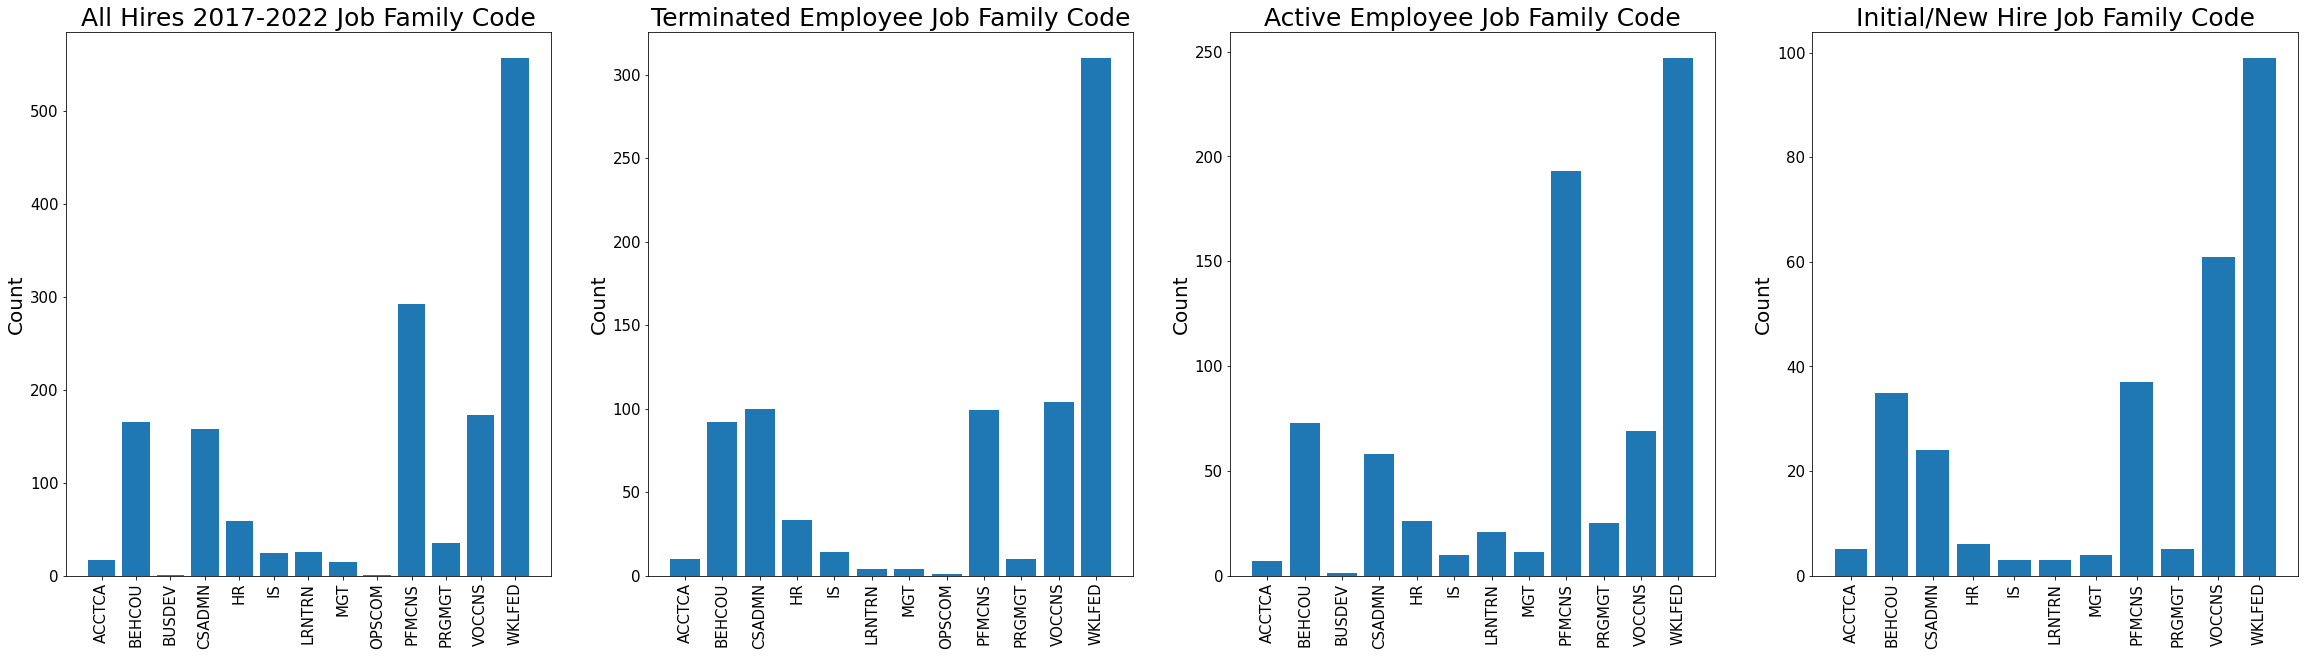

In [63]:
plt.rcParams['figure.figsize'] = (40, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 4)
fig.subplots_adjust(hspace=1)

# make the data read to feed into the visulizer
X_JFC = data.groupby('Job Family Code').size().reset_index(name='Counts')['Job Family Code']
Y_JFC = data.groupby('Job Family Code').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0].bar(X_JFC, Y_JFC)
axes[0].set_title('All Hires 2017-2022 Job Family Code', fontsize=25)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].tick_params(axis='x', rotation = 90)

X_TJFC = term_data.groupby('Job Family Code').size().reset_index(name='Counts')['Job Family Code']
Y_TJFC = term_data.groupby('Job Family Code').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1].bar(X_TJFC, Y_TJFC)
axes[1].set_title('Terminated Employee Job Family Code', fontsize=25)
axes[1].set_ylabel('Count', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].tick_params(axis='x', rotation = 90)

X_AJFC = active_data.groupby('Job Family Code').size().reset_index(name='Counts')['Job Family Code']
Y_AJFC = active_data.groupby('Job Family Code').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[2].bar(X_AJFC, Y_AJFC)
axes[2].set_title('Active Employee Job Family Code', fontsize=25)
axes[2].set_ylabel('Count', fontsize=20)
axes[2].tick_params(axis='both', labelsize=15)
axes[2].tick_params(axis='x', rotation = 90)

X_NJFC = new_data.groupby('Job Family Code').size().reset_index(name='Counts')['Job Family Code']
Y_NJFC = new_data.groupby('Job Family Code').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[3].bar(X_NJFC, Y_NJFC)
axes[3].set_title('Initial/New Hire Job Family Code', fontsize=25)
axes[3].set_ylabel('Count', fontsize=20)
axes[3].tick_params(axis='both', labelsize=15)
axes[3].tick_params(axis='x', rotation = 90)

#plt.show()
plt.savefig('all_job')

### Org Level 1 for all datasets

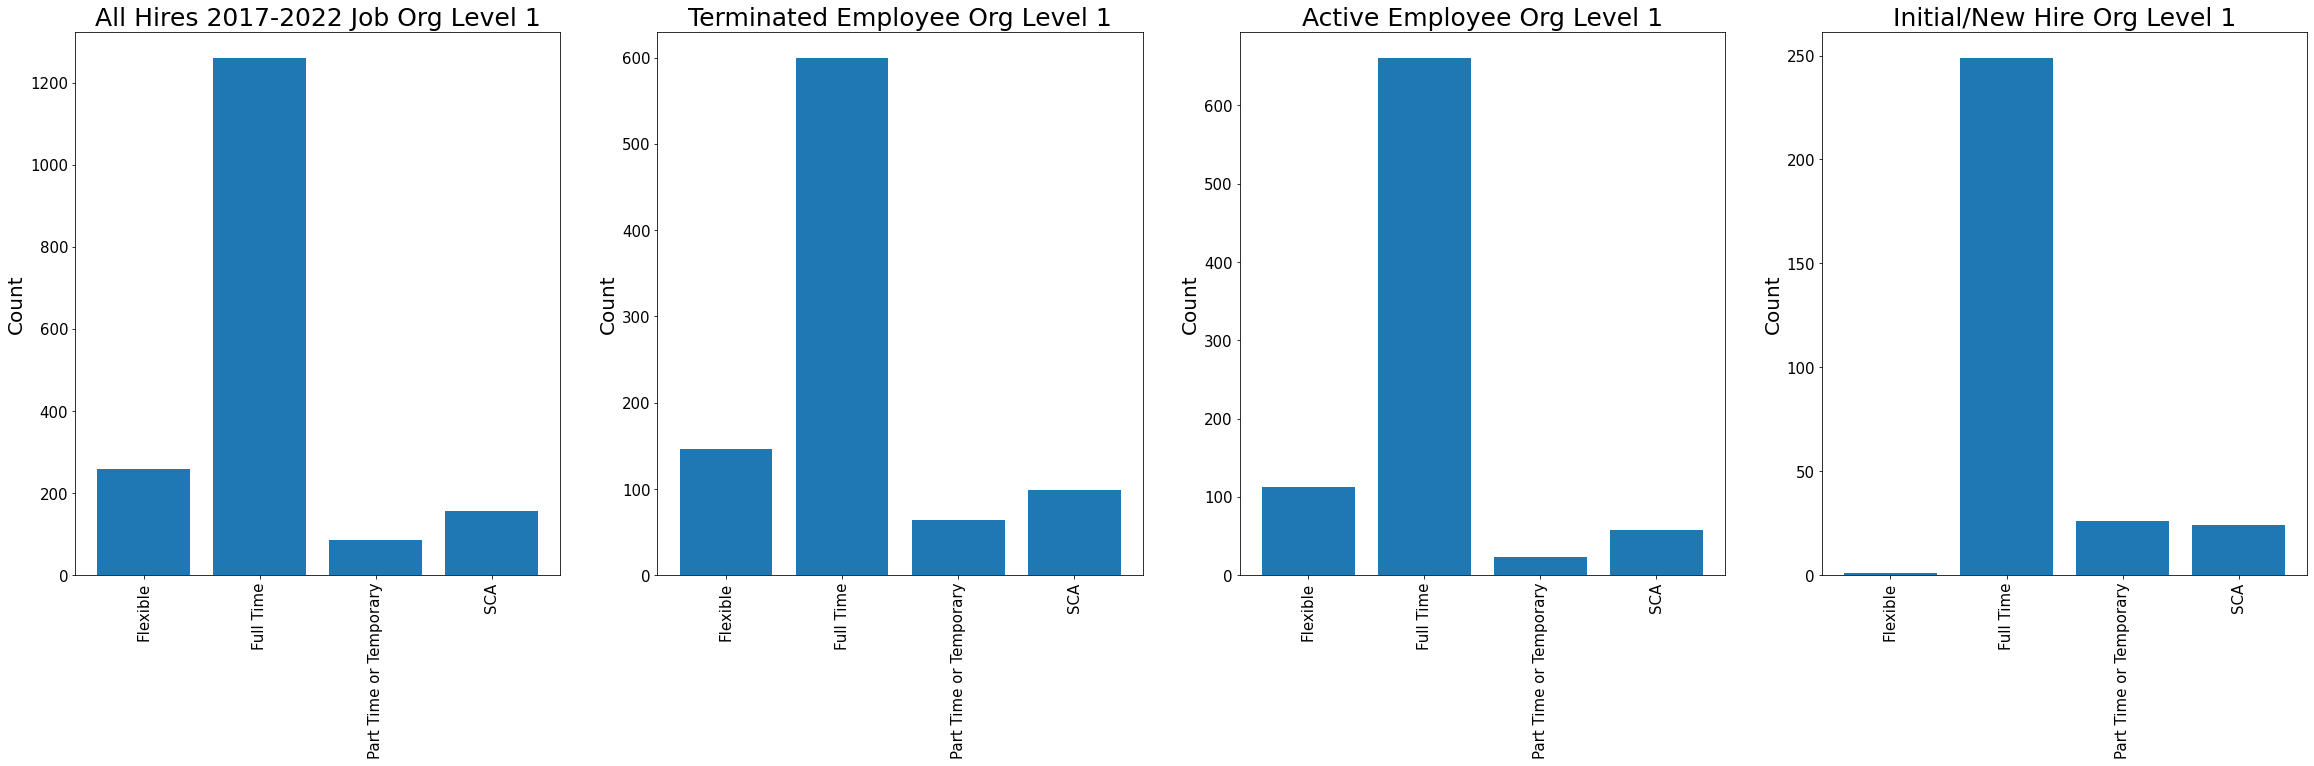

In [64]:
plt.rcParams['figure.figsize'] = (40, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 4)
fig.subplots_adjust(hspace=1)

# make the data read to feed into the visulizer
X_O1 = data.groupby('Org Level 1').size().reset_index(name='Counts')['Org Level 1']
Y_O1= data.groupby('Org Level 1').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0].bar(X_O1, Y_O1)
axes[0].set_title('All Hires 2017-2022 Job Org Level 1', fontsize=25)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].tick_params(axis='x', rotation = 90)

X_TO1 = term_data.groupby('Org Level 1').size().reset_index(name='Counts')['Org Level 1']
Y_TO1 = term_data.groupby('Org Level 1').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1].bar(X_TO1, Y_TO1)
axes[1].set_title('Terminated Employee Org Level 1', fontsize=25)
axes[1].set_ylabel('Count', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].tick_params(axis='x', rotation = 90)

X_AO1 = active_data.groupby('Org Level 1').size().reset_index(name='Counts')['Org Level 1']
Y_AO1 = active_data.groupby('Org Level 1').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[2].bar(X_AO1, Y_AO1)
axes[2].set_title('Active Employee Org Level 1', fontsize=25)
axes[2].set_ylabel('Count', fontsize=20)
axes[2].tick_params(axis='both', labelsize=15)
axes[2].tick_params(axis='x', rotation = 90)

X_NO1 = new_data.groupby('Org Level 1').size().reset_index(name='Counts')['Org Level 1']
Y_NO1 = new_data.groupby('Org Level 1').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[3].bar(X_NO1, Y_NO1)
axes[3].set_title('Initial/New Hire Org Level 1', fontsize=25)
axes[3].set_ylabel('Count', fontsize=20)
axes[3].tick_params(axis='both', labelsize=15)
axes[3].tick_params(axis='x', rotation = 90)

#plt.show()
plt.savefig('all_org1')

### Org Level 2 for all datasets

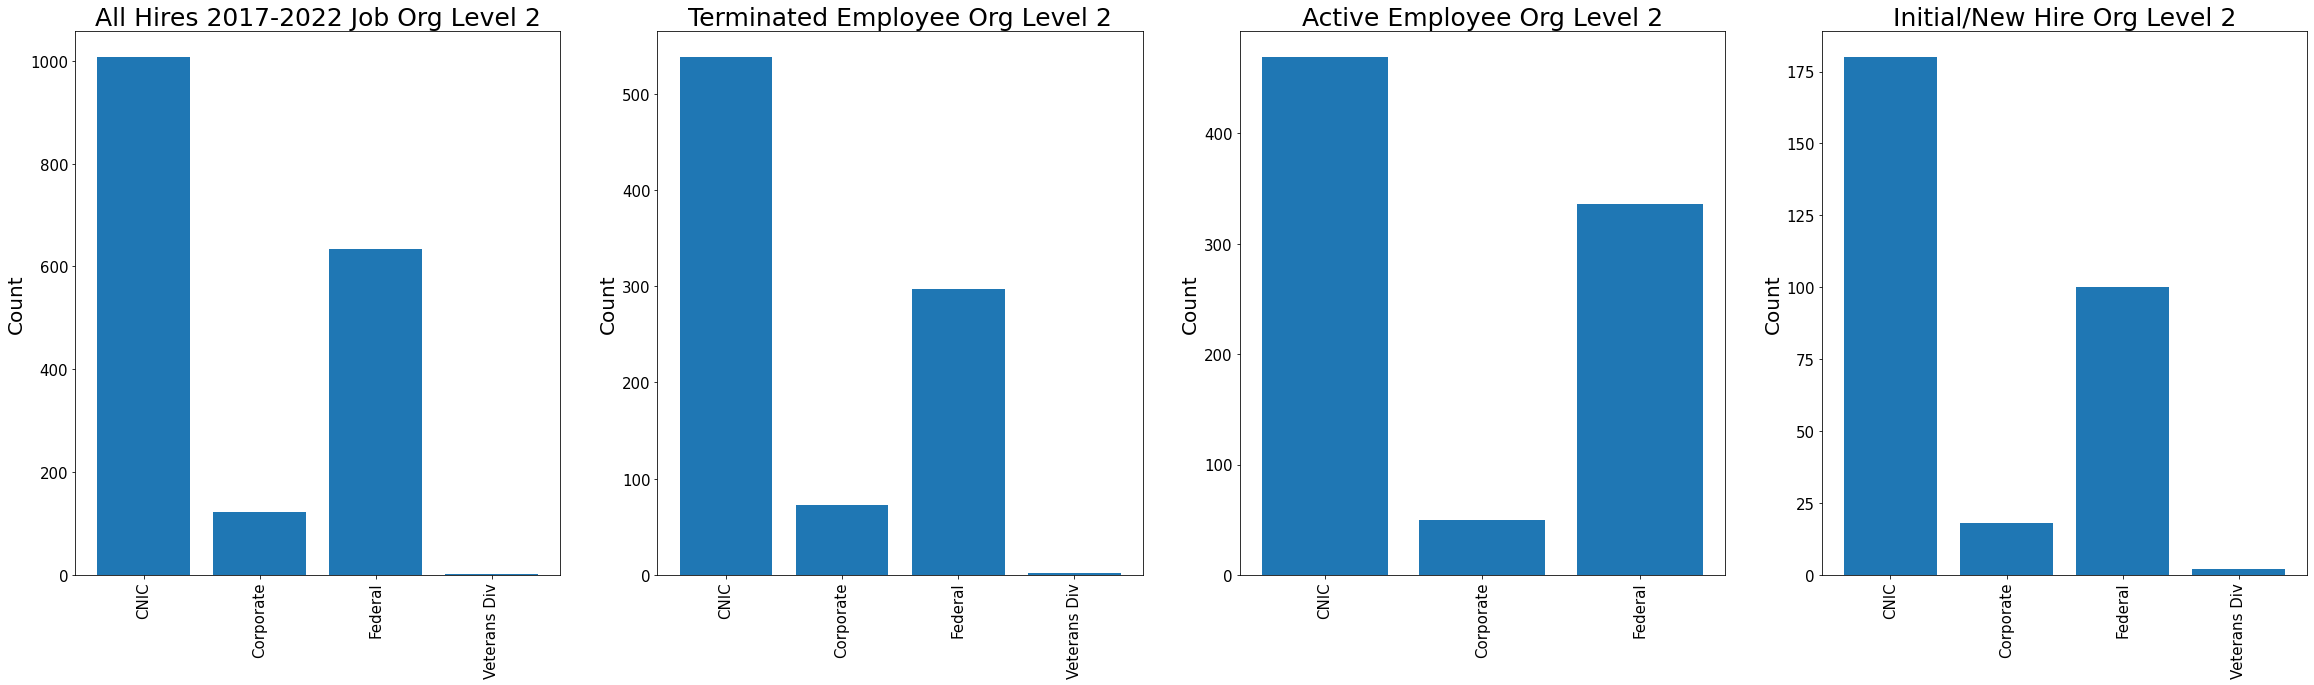

In [65]:
plt.rcParams['figure.figsize'] = (40, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 4)
fig.subplots_adjust(hspace=1)


# make the data read to feed into the visulizer
X_O2 = data.groupby('Org Level 2').size().reset_index(name='Counts')['Org Level 2']
Y_O2= data.groupby('Org Level 2').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0].bar(X_O2, Y_O2)
axes[0].set_title('All Hires 2017-2022 Job Org Level 2', fontsize=25)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].tick_params(axis='x', rotation = 90)

X_TO2 = term_data.groupby('Org Level 2').size().reset_index(name='Counts')['Org Level 2']
Y_TO2 = term_data.groupby('Org Level 2').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1].bar(X_TO2, Y_TO2)
axes[1].set_title('Terminated Employee Org Level 2', fontsize=25)
axes[1].set_ylabel('Count', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].tick_params(axis='x', rotation = 90)

X_AO2 = active_data.groupby('Org Level 2').size().reset_index(name='Counts')['Org Level 2']
Y_AO2 = active_data.groupby('Org Level 2').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[2].bar(X_AO2, Y_AO2)
axes[2].set_title('Active Employee Org Level 2', fontsize=25)
axes[2].set_ylabel('Count', fontsize=20)
axes[2].tick_params(axis='both', labelsize=15)
axes[2].tick_params(axis='x', rotation = 90)

X_NO2 = new_data.groupby('Org Level 2').size().reset_index(name='Counts')['Org Level 2']
Y_NO2 = new_data.groupby('Org Level 2').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[3].bar(X_NO2, Y_NO2)
axes[3].set_title('Initial/New Hire Org Level 2', fontsize=25)
axes[3].set_ylabel('Count', fontsize=20)
axes[3].tick_params(axis='both', labelsize=15)
axes[3].tick_params(axis='x', rotation = 90)

#plt.show()
plt.savefig('all_org2')

### Org Level 3 for all datasets

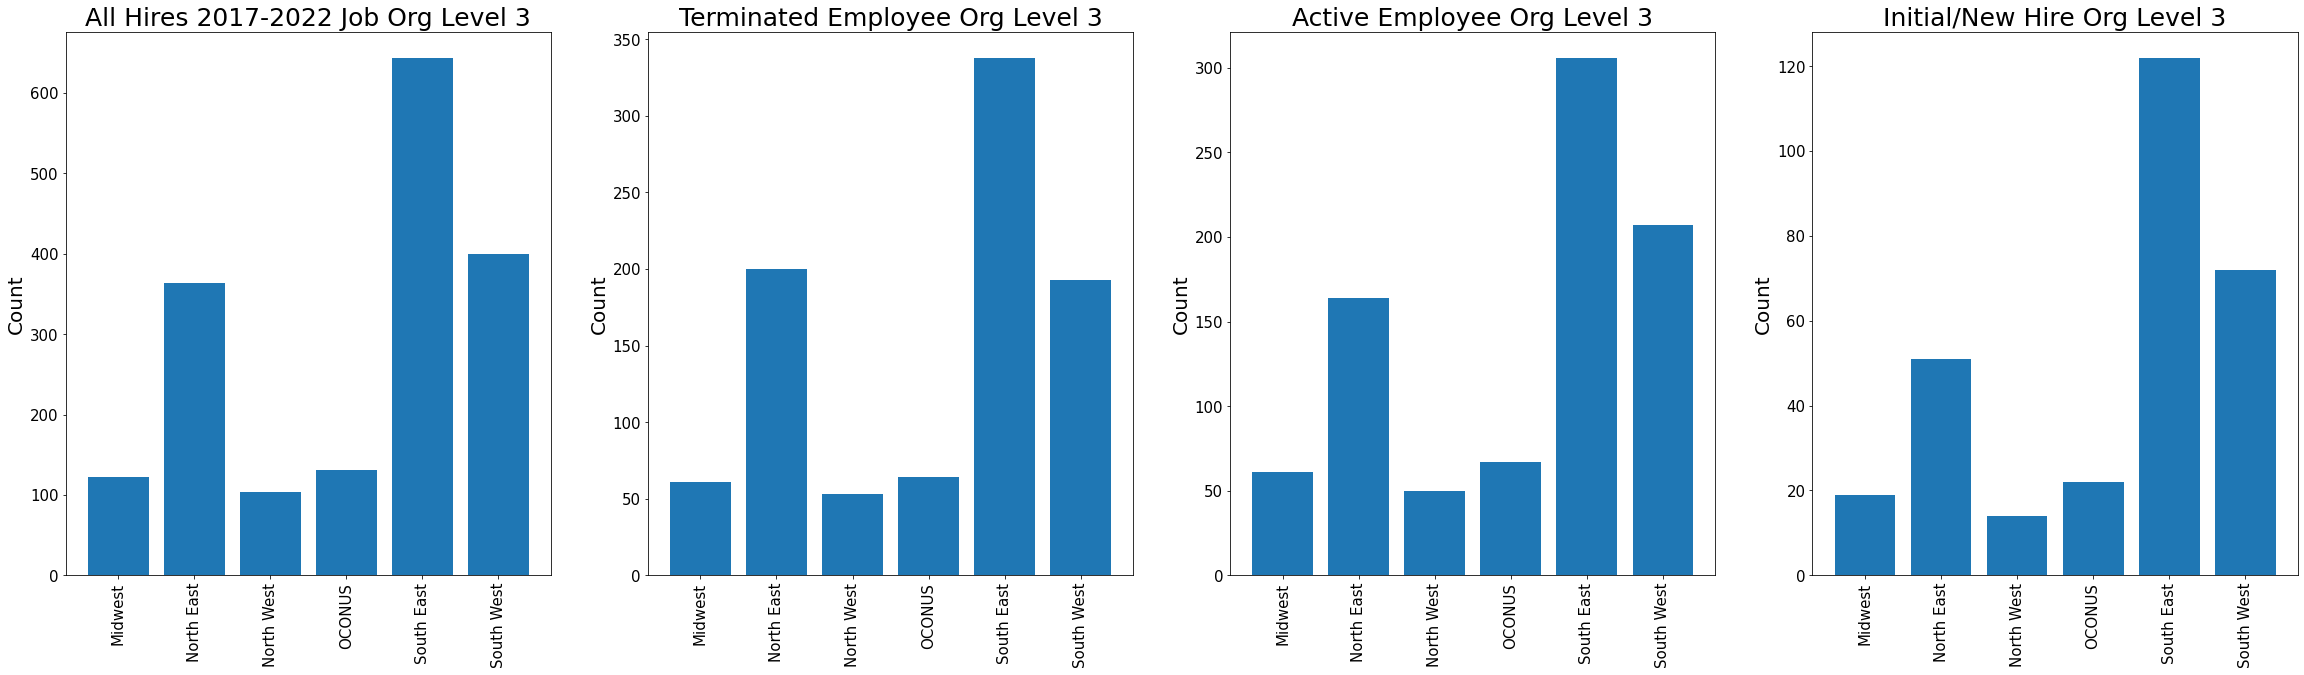

In [66]:
plt.rcParams['figure.figsize'] = (40, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 4)
fig.subplots_adjust(hspace=1)

# make the data read to feed into the visulizer
X_O3 = data.groupby('Org Level 3').size().reset_index(name='Counts')['Org Level 3']
Y_O3 = data.groupby('Org Level 3').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0].bar(X_O3, Y_O3)
axes[0].set_title('All Hires 2017-2022 Job Org Level 3', fontsize=25)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].tick_params(axis='x', rotation = 90)

X_TO3 = term_data.groupby('Org Level 3').size().reset_index(name='Counts')['Org Level 3']
Y_TO3 = term_data.groupby('Org Level 3').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1].bar(X_TO3, Y_TO3)
axes[1].set_title('Terminated Employee Org Level 3', fontsize=25)
axes[1].set_ylabel('Count', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].tick_params(axis='x', rotation = 90)

X_AO3 = active_data.groupby('Org Level 3').size().reset_index(name='Counts')['Org Level 3']
Y_AO3 = active_data.groupby('Org Level 3').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[2].bar(X_AO3, Y_AO3)
axes[2].set_title('Active Employee Org Level 3', fontsize=25)
axes[2].set_ylabel('Count', fontsize=20)
axes[2].tick_params(axis='both', labelsize=15)
axes[2].tick_params(axis='x', rotation = 90)

X_NO3 = new_data.groupby('Org Level 3').size().reset_index(name='Counts')['Org Level 3']
Y_NO3 = new_data.groupby('Org Level 3').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[3].bar(X_NO3, Y_NO3)
axes[3].set_title('Initial/New Hire Org Level 3', fontsize=25)
axes[3].set_ylabel('Count', fontsize=20)
axes[3].tick_params(axis='both', labelsize=15)
axes[3].tick_params(axis='x', rotation = 90)

#plt.show()
plt.savefig('all_org3')

### Org Level 4 for all datasets

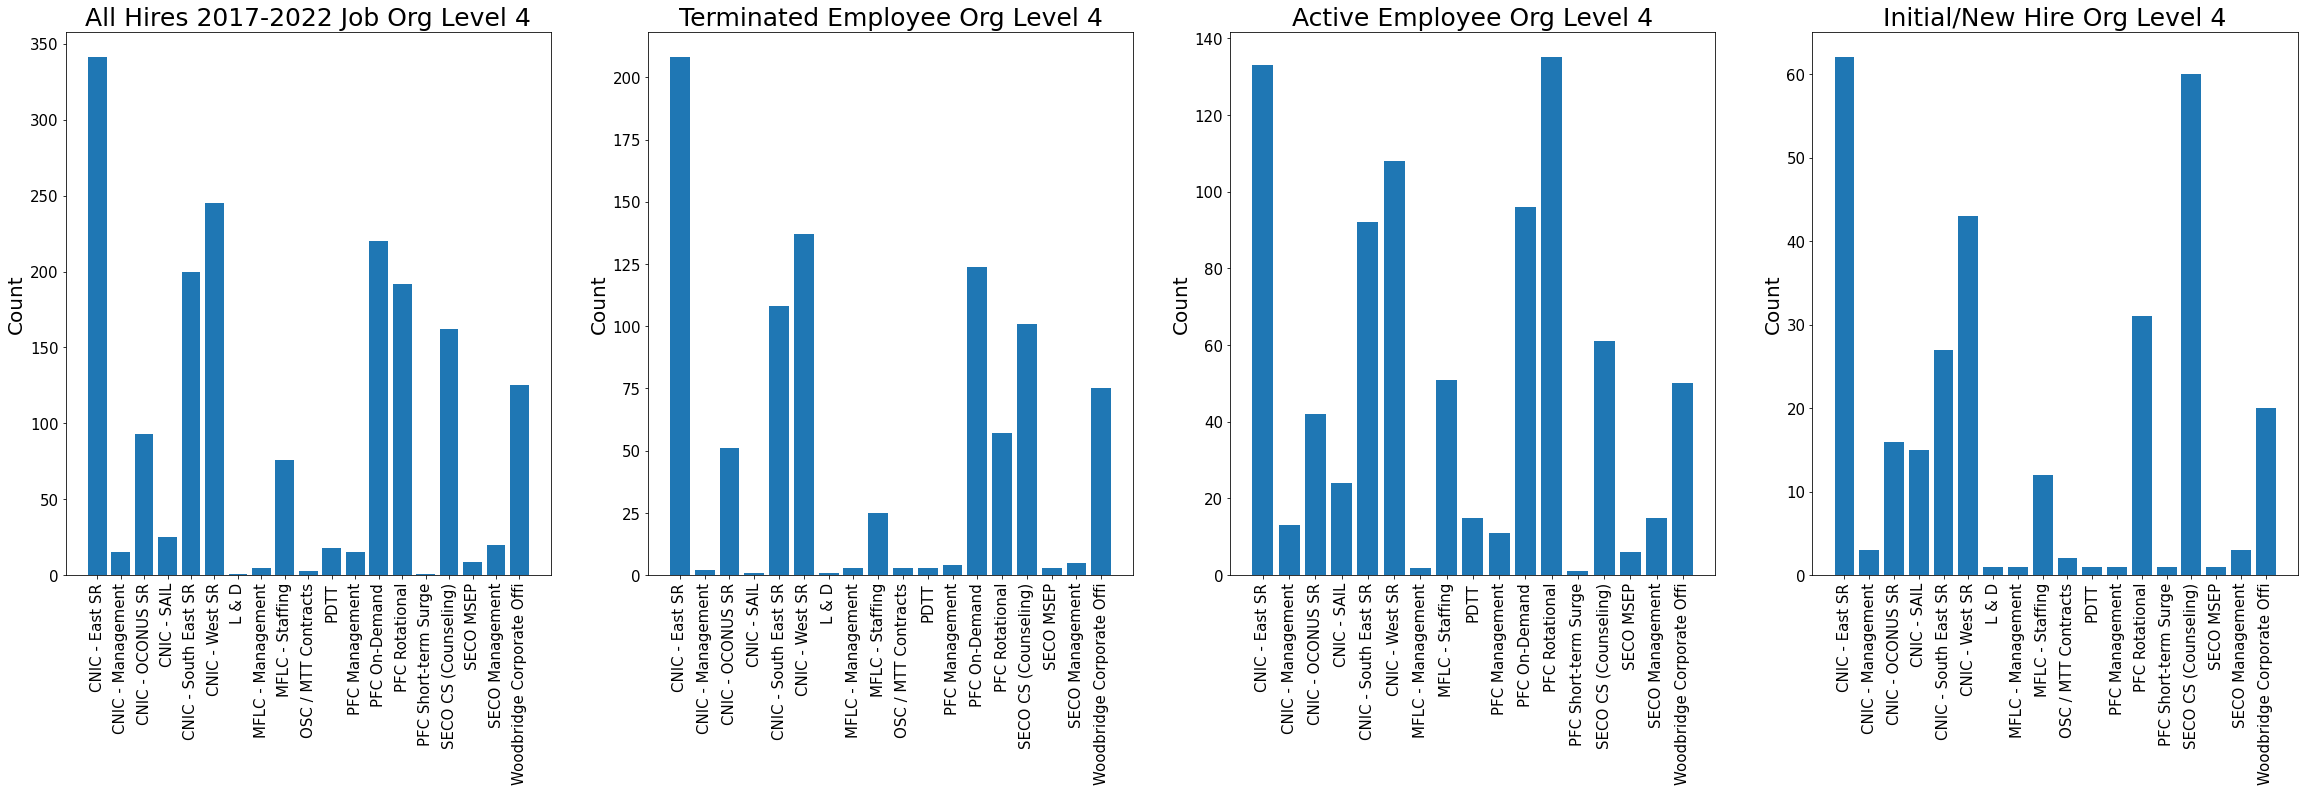

In [67]:
plt.rcParams['figure.figsize'] = (40, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 4)
fig.subplots_adjust(hspace=1)


# make the data read to feed into the visulizer
X_O4 = data.groupby('Org Level 4').size().reset_index(name='Counts')['Org Level 4']
Y_O4 = data.groupby('Org Level 4').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0].bar(X_O4, Y_O4)
axes[0].set_title('All Hires 2017-2022 Job Org Level 4', fontsize=25)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].tick_params(axis='x', rotation = 90)

X_TO4 = term_data.groupby('Org Level 4').size().reset_index(name='Counts')['Org Level 4']
Y_TO4 = term_data.groupby('Org Level 4').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1].bar(X_TO4, Y_TO4)
axes[1].set_title('Terminated Employee Org Level 4', fontsize=25)
axes[1].set_ylabel('Count', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].tick_params(axis='x', rotation = 90)

X_AO4 = active_data.groupby('Org Level 4').size().reset_index(name='Counts')['Org Level 4']
Y_AO4 = active_data.groupby('Org Level 4').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[2].bar(X_AO4, Y_AO4)
axes[2].set_title('Active Employee Org Level 4', fontsize=25)
axes[2].set_ylabel('Count', fontsize=20)
axes[2].tick_params(axis='both', labelsize=15)
axes[2].tick_params(axis='x', rotation = 90)

X_NO4 = new_data.groupby('Org Level 4').size().reset_index(name='Counts')['Org Level 4']
Y_NO4 = new_data.groupby('Org Level 4').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[3].bar(X_NO4, Y_NO4)
axes[3].set_title('Initial/New Hire Org Level 4', fontsize=25)
axes[3].set_ylabel('Count', fontsize=20)
axes[3].tick_params(axis='both', labelsize=15)
axes[3].tick_params(axis='x', rotation = 90)

#plt.show()
plt.savefig('all_org4')

### Termination Type Code for all Terminated Employees and Intial data sets

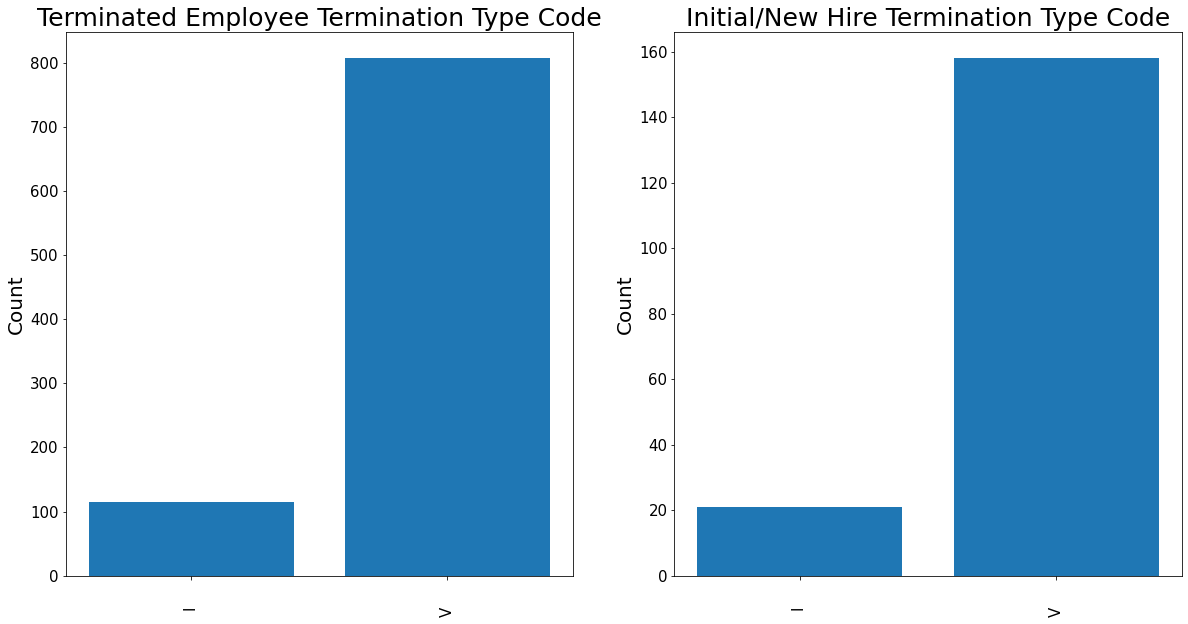

In [68]:
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.subplots_adjust(hspace=1)

# make the data read to feed into the visulizer
X_TTermType = term_data.groupby('Termination Type Code').size().reset_index(name='Counts')['Termination Type Code']
Y_TTermType = term_data.groupby('Termination Type Code').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0].bar(X_TTermType, Y_TTermType)
axes[0].set_title('Terminated Employee Termination Type Code', fontsize=25)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_NTermType = new_data.groupby('Termination Type Code').size().reset_index(name='Counts')['Termination Type Code']
Y_NTermType = new_data.groupby('Termination Type Code').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1].bar(X_NTermType, Y_NTermType)
axes[1].set_title('Initial/New Hire Termination Type Code', fontsize=25)
axes[1].set_ylabel('Count', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].tick_params(axis='x', rotation = 90)

plt.savefig('tn_termtype')

### Termination Reason for all Terminated Employees and Intial data sets

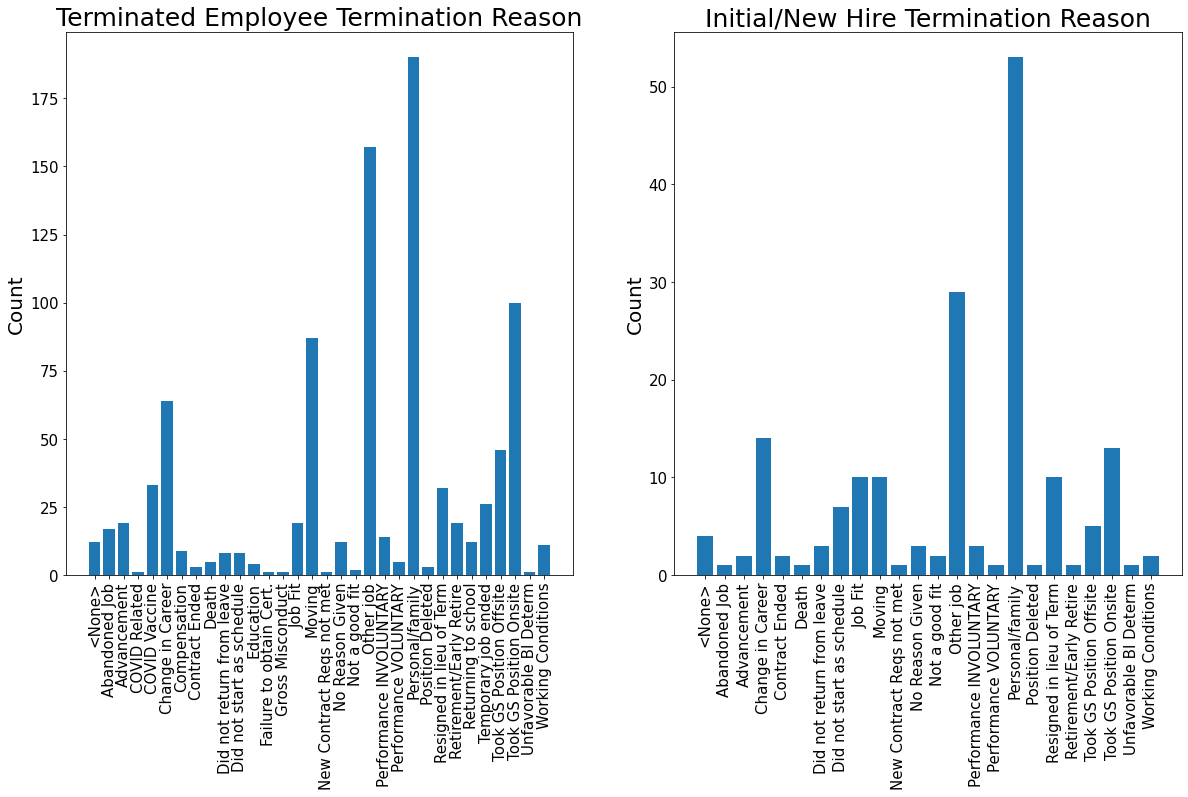

In [69]:
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.subplots_adjust(hspace=1)

# make the data read to feed into the visulizer
X_TTermReason = term_data.groupby('Termination Reason').size().reset_index(name='Counts')['Termination Reason']
Y_TTermReason = term_data.groupby('Termination Reason').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0].bar(X_TTermReason, Y_TTermReason)
axes[0].set_title('Terminated Employee Termination Reason', fontsize=25)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_NTermReason = new_data.groupby('Termination Reason').size().reset_index(name='Counts')['Termination Reason']
Y_NTermReason = new_data.groupby('Termination Reason').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1].bar(X_NTermReason, Y_NTermReason)
axes[1].set_title('Initial/New Hire Termination Reason', fontsize=25)
axes[1].set_ylabel('Count', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].tick_params(axis='x', rotation = 90)

plt.savefig('tn_termreason')

### Termination Reason Code for all Terminated Employees and Intial data sets

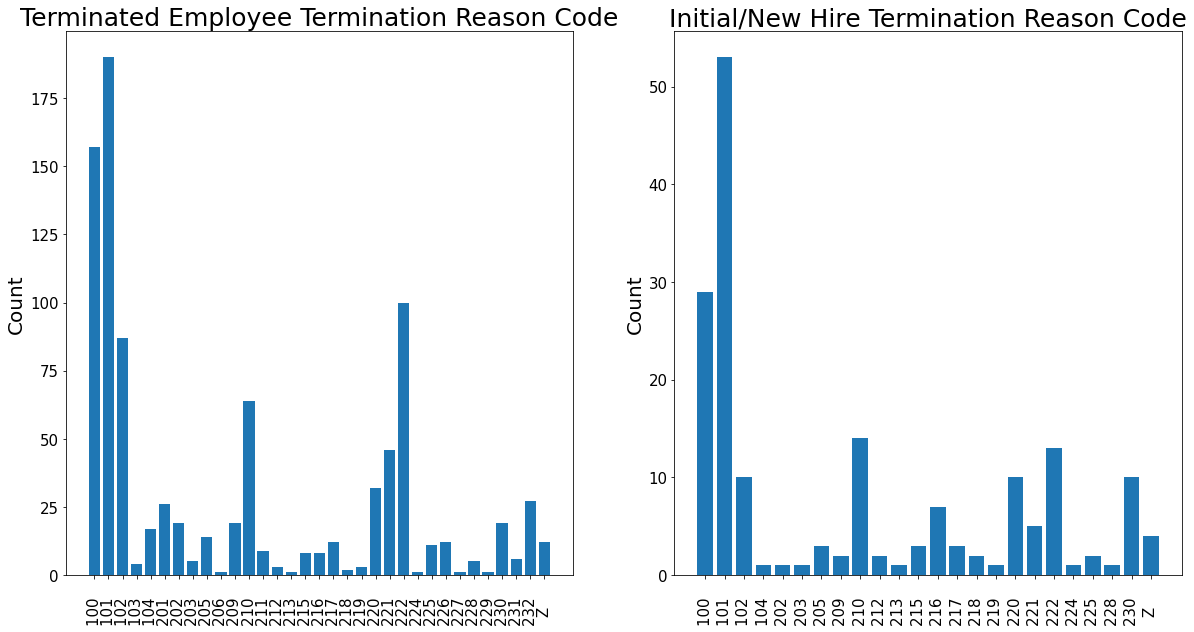

In [70]:
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.subplots_adjust(hspace=1)

# make the data read to feed into the visulizer
X_TTermReason = term_data.groupby('Termination Reason Code').size().reset_index(name='Counts')['Termination Reason Code']
Y_TTermReason = term_data.groupby('Termination Reason Code').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0].bar(X_TTermReason, Y_TTermReason)
axes[0].set_title('Terminated Employee Termination Reason Code', fontsize=25)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer
X_NTermReason = new_data.groupby('Termination Reason Code').size().reset_index(name='Counts')['Termination Reason Code']
Y_NTermReason = new_data.groupby('Termination Reason Code').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1].bar(X_NTermReason, Y_NTermReason)
axes[1].set_title('Initial/New Hire Termination Reason Code', fontsize=25)
axes[1].set_ylabel('Count', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].tick_params(axis='x', rotation = 90)

plt.savefig('tn_termreasoncode')

In [71]:
### Scatter of Employment vs Pay Rate

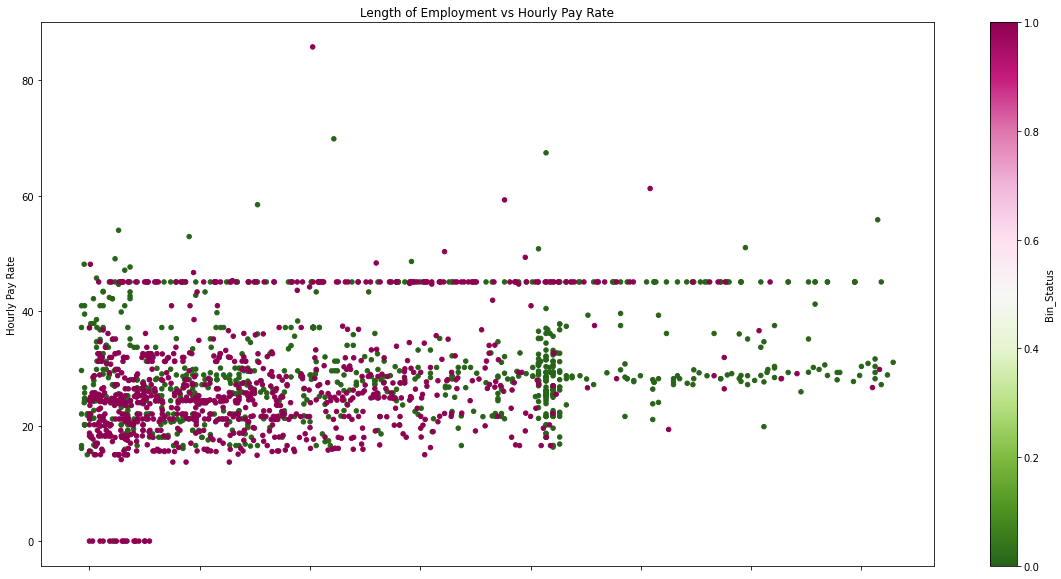

In [72]:
data.plot.scatter(x='Length of Employment', y='Hourly', c='Bin_Status',
    colormap='PiYG_r', 
    title='Length of Employment vs Hourly Pay Rate',
    ylabel ='Hourly Pay Rate',
    xlabel = 'Length of Employment')

plt.savefig('length_vs_hourly')

### Looking at statistics per year

In [73]:
num_features = ['Annual','Hourly', 'Length of Employment']
per_year = data.groupby(data['Last Hire Date'].dt.to_period('Y'))[num_features].agg(['mean', 'max', 'min'])
per_year.reset_index(level=0, inplace=True)
per_year

Last Hire Date        Annual                       Hourly                  \
                          mean          max  min       mean        max  min   
0           2017  27097.120064  116061.5893  0.0  35.463838  55.796695  0.0   
1           2018  32473.073683  127345.0270  0.0  34.344930  61.221216  0.0   
2           2019  47434.059183  178500.0434  0.0  28.218257  85.814028  0.0   
3           2020  43012.312218  101000.0000  0.0  26.792268  48.555825  0.0   
4           2021  50271.165474  145300.0000  0.0  27.563157  69.853083  0.0   
5           2022  48476.860403  112270.0000  0.0  27.560575  53.973886  0.0   

  Length of Employment                
                  mean     max   min  
0          1108.641026  1822.0  31.0  
1           954.295858  1701.0   0.0  
2           710.598261  1338.0   0.0  
3           505.541420   973.0   0.0  
4           311.994536   605.0   0.0  
5           101.378007   241.0 -18.0

### Non-starting Employees

In [74]:
non_data = all_data.loc[all_data['Termination Reason'] == 'Did not start as schedule']
non_data.head(3)

,Last Hire Date,Termination Date,Last Hire Years,City,State,Country,Employment Status,Employment Type,Job Code,Job Family Code,...,Termination Reason,Termination Reason Code,Org Level 1,Org Level 2,Org Level 3,Annual,Org Level 4,Hourly,Bin_Status,Length of Employment
946,2019-05-06,2019-05-06,0.0,Capitol Heights,MD,United States,Terminated,Initial,SECOEC31,VOCCNS,...,Did not start as schedule,216,Part Time or Temporary,Federal,North East,19001.5308,SECO CS (Counseling),18.270000,1,0.0
1182,2019-02-01,2019-04-18,0.1,Hinckley,OH,United States,Terminated,Flexible,ODOH08,NaN,...,Did not start as schedule,216,Flexible,Federal,Midwest,0.0000,PFC On-Demand,45.000000,1,76.0
1188,2019-11-18,2019-11-18,0.0,Honolulu,HI,United States,Terminated,Initial,CECMPH01,WKLFED,...,Did not start as schedule,216,Full Time,CNIC,OCONUS,51000.0000,CNIC - OCONUS SR,24.518288,1,0.0


In [75]:
non_data.shape

(8, 21)

In [76]:
non_data.describe()

,Last Hire Years,Annual,Hourly,Bin_Status,Length of Employment
count,8.000000,8.000000,8.000000,8.0,8.000000
mean,0.037500,29512.454300,23.740634,1.0,19.500000
std,0.074402,16891.112045,9.179704,0.0,35.809017
min,0.000000,0.000000,15.650000,1.0,0.000000
25%,0.000000,20506.988700,18.337500,1.0,0.000000
50%,0.000000,28949.513400,21.878393,1.0,0.000000
75%,0.025000,40892.701600,24.407072,1.0,19.750000
max,0.200000,51000.000000,45.000000,1.0,79.000000


In [77]:
non_data.describe(include=['O'])

,City,State,Country,Employment Status,Employment Type,Job Code,Job Family Code,Termination Type Code,Termination Reason,Termination Reason Code,Org Level 1,Org Level 2,Org Level 3,Org Level 4
count,8,8,8,8,8,8,7,8,8,8,8,8,8,8
unique,8,7,1,1,2,8,3,1,1,1,4,2,4,4
top,Capitol Heights,VA,United States,Terminated,Initial,SECOEC31,VOCCNS,V,Did not start as schedule,216,Part Time or Temporary,Federal,South East,SECO CS (Counseling)
freq,1,2,8,8,7,1,4,8,8,8,3,5,4,4


---
---

In [78]:
#Converting categorical data into numbers
cat_features = ['City', 'State', 'Country', 'Employment Status', 'Employment Type', 'Job Code',
                'Job Family Code', 'Org Level 1','Org Level 2', 'Org Level 3', 'Org Level 4', ]
data_cat = data[cat_features]

# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)

In [79]:
features_model = ['Annual','Hourly','Length of Employment']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

In [80]:
data_model_Y = all_data['Bin_Status']

In [81]:
from sklearn.model_selection import train_test_split
# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_Y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

No. of samples in training set:  1244
No. of samples in validation set: 534


In [82]:
# Terminated and Active Employees in sets
print('\n')
print('No. of still employed and terminated in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of still employed and terminated in the validation set:')
print(y_val.value_counts())



No. of still employed and terminated in the training set:
1    651
0    593
Name: Bin_Status, dtype: int64


No. of still employed and terminated in the validation set:
1    271
0    263
Name: Bin_Status, dtype: int64


### Apply ML Models

In [83]:
models = {}

# Logistic Regression 
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

 
# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()
 

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()
 

# Random Forest
from sklearn.ensemble import RandomForestClassifier

models['Random Forest'] = RandomForestClassifier()
 

# Naive Bayes
from sklearn.naive_bayes import GaussianNB 
models['Naive Bayes'] = GaussianNB()
 

# K-Nearest Neighbors 
from sklearn.neighbors import KNeighborsClassifier 
models['K-Nearest Neighbor'] = KNeighborsClassifier()


### Get Metrics

In [84]:

from sklearn.metrics import accuracy_score, precision_score, recall_score 
accuracy, precision, recall = {}, {}, {}
 

for key in models.keys():
    # Fit the classifier
    models[key].fit(X_train, y_train)
 
    # Make predictions
    predictions = models[key].predict(X_val)
 
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_val)
    precision[key] = precision_score(predictions, y_val)
    recall[key] = recall_score(predictions, y_val)
    
    
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])

df_model['Accuracy'] = accuracy.values()

df_model['Precision'] = precision.values()

df_model['Recall'] = recall.values()

df_model

C:\Users\katie\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Accuracy,Precision,Recall
Logistic Regression,0.599251,0.686347,0.590476
Support Vector Machines,0.576779,1.000000,0.545272
Decision Trees,1.000000,1.000000,1.000000
Random Forest,1.000000,1.000000,1.000000
Naive Bayes,0.973783,0.974170,0.974170
K-Nearest Neighbor,0.659176,0.749077,0.640379


### Visualize Model Metrics

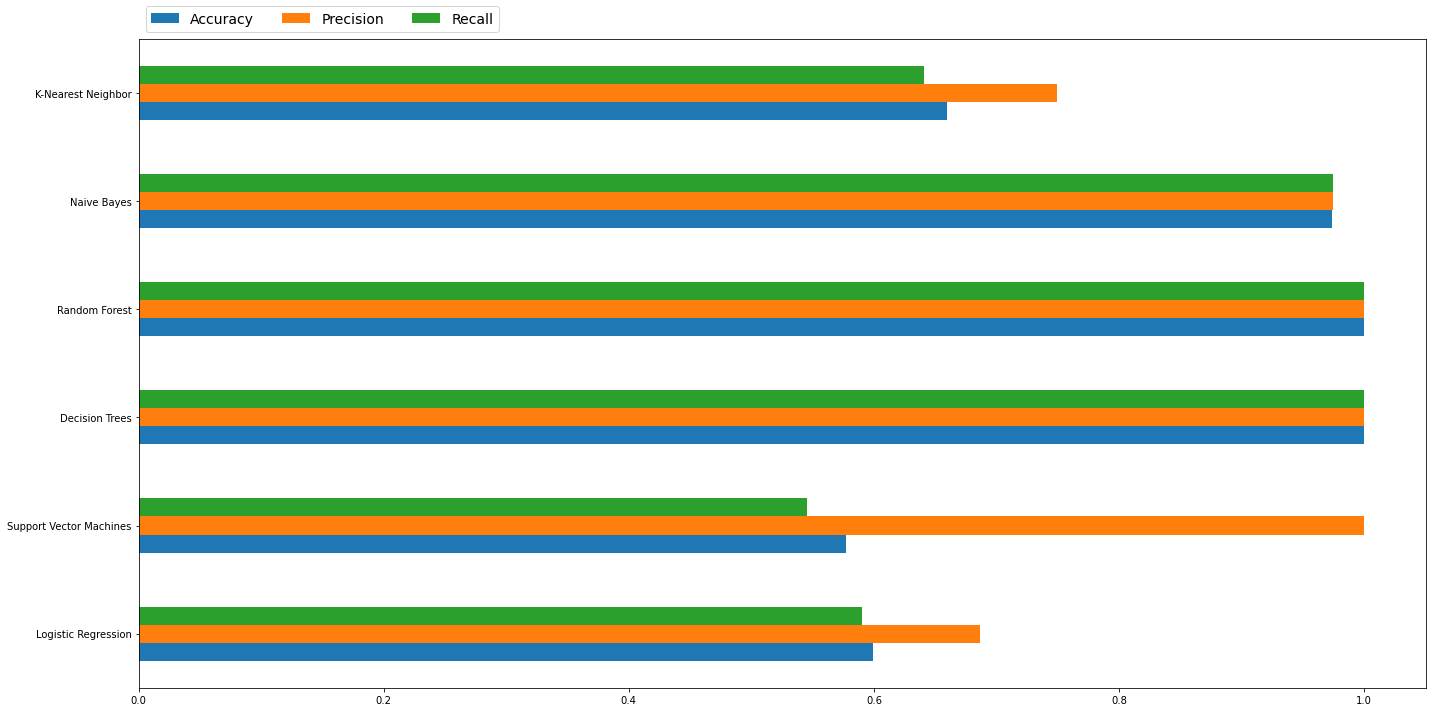

In [85]:
ax = df_model.plot.barh()
 
ax.legend(
   ncol=len(models.keys()), 
   bbox_to_anchor=(0, 1), 
   loc='lower left', 
   prop={'size': 14})

plt.tight_layout()
plt.savefig('ML Model Metrics')